<div style="border:solid green 3px; padding: 20px">
																					
<b>Привет!</b>
																					
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
																					
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
																					
																					
Для твоего удобства, я буду выделять свои комментарии следующим образом:
																					
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
																					
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
																					
</div>
																					
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>
																					
																					
Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.
																					
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
																					
<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 
																					
Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху
																					
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)
																					
P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
																					    
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Понято, принято 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Импорт нужных библиотек для работы:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

### Изучение общей информации

In [2]:
# загружаем данные из файла в dataframe
try:
    data = pd.read_csv('../datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# проверяем данные
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b>
<br>Если ты работаешь локально, то следует указывать два пути к файлу через конструкцию try...except...
<br>Поправь, пожалуйста, чтобы я смог проверить твой проект. На всякий случай приложу путь к файлу на платформе
    
    /datasets/real_estate_data.csv
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Поправила, теперь должно работать и локально и на платформе) 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Теперь всё работает) Перехожу к проверке!
</div>

 <div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой
			
	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Добавила, теперь отображаются все фичи 
</div>

In [3]:
# посмотрим на общую информацию по данным
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Первое, что бросается в глаза - большое количество пропусков, к которым я вернусь на этапе предобработки данных.  
Изучим, какие данные есть для дальнейшей работы и посмотрим подробнее на распределение характеристик объявлений:

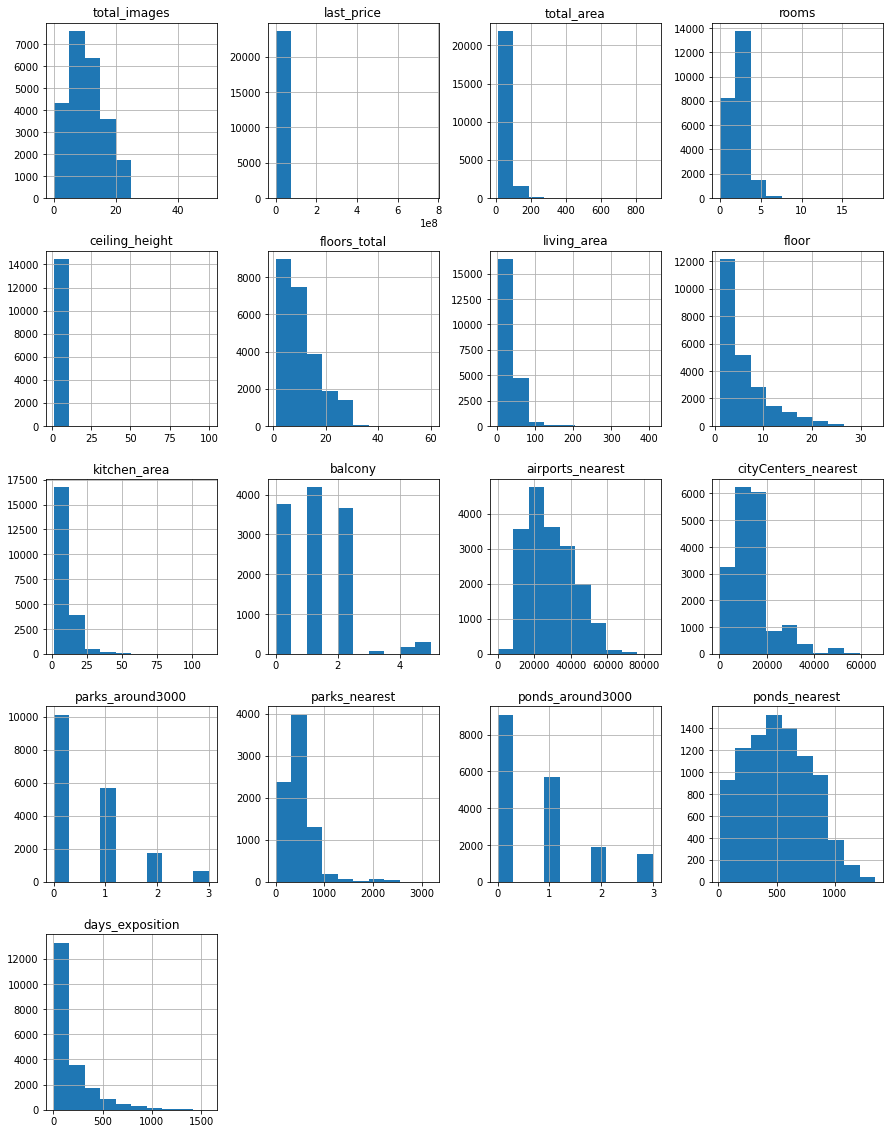

In [4]:
data.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Поправила, так правда гораздо симпатичнее)
</div>

#### *Посмотрим на каждый показатель детальнее:*

Медианное значение: 9.0 
Cреднее значение:9.858475041140977


<AxesSubplot:ylabel='Frequency'>

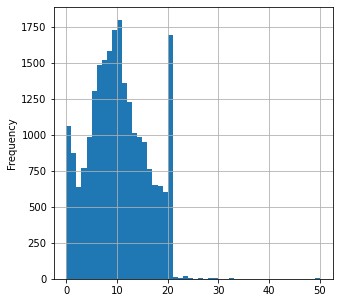

In [5]:
# total_images число фотографий квартиры в объявлении
researched_data = data['total_images']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(5, 5), bins=50, grid=True)

Самый частый случай, кога у объявления 10 фотографий. Т.к. есть пики на 0 и 20, а также артефакты, когда фотографий > 20, медианное значение = 9.

Медианное значение: 4650000.0 
Cреднее значение:6541548.771551542


<AxesSubplot:ylabel='Frequency'>

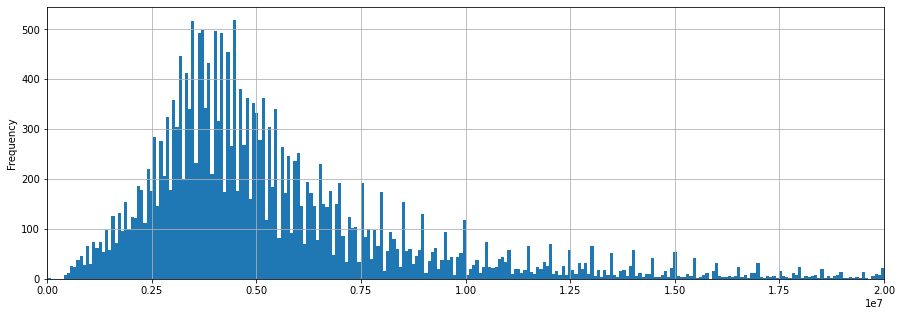

In [6]:
# last_price цена на момент снятия с публикации
researched_data = data['last_price']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=10000, grid=True, xlim=(0, 20000000))

Среднее и медианное значение стоимости недвижимости на момент снятия объявления за всё рвемя сильно отличаются, нужно будет подробнее изучить этот показатель, посмотреть зависимости с другими.

Медианное значение: 52.0 
Cреднее значение:60.34865099793241


<AxesSubplot:ylabel='Frequency'>

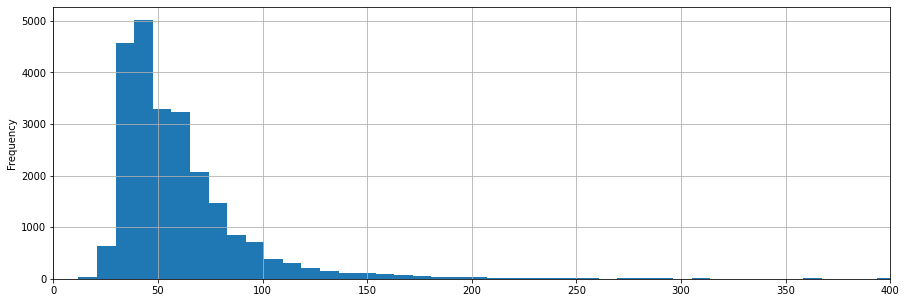

In [7]:
# total_area общая площадь квартиры в квадратных метрах (м²)
researched_data = data['total_area']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=100, grid=True, xlim=(0, 400))

Самые частые предложения - от 30, до 75 м². Более 100 м² уже более редкие предложения

Медианное значение: 2.0 
Cреднее значение:2.070635891809781


<AxesSubplot:ylabel='Frequency'>

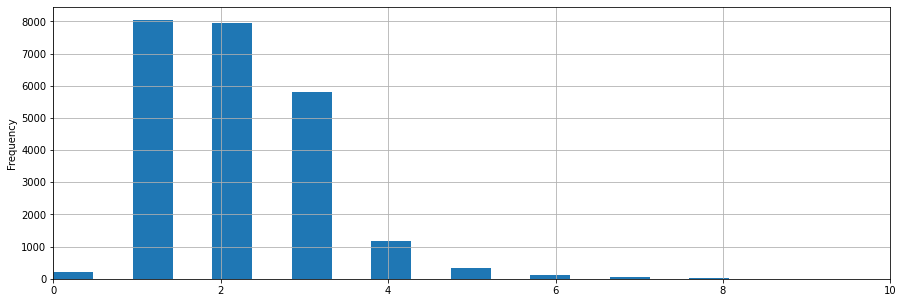

In [8]:
# rooms число комнат
researched_data = data['rooms']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=40, grid=True, xlim=(0, 10))

Студии, двушки и трёшки - самые популяерные, но есть и странные предложения, где комнат 0.

Медианное значение: 2.65 
Cреднее значение:2.77149889685604


<AxesSubplot:ylabel='Frequency'>

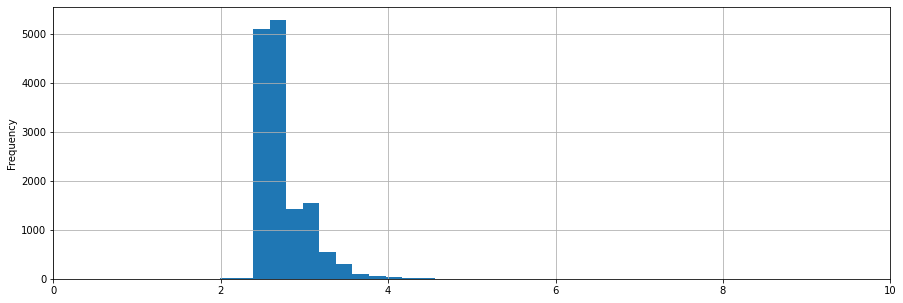

In [9]:
# ceiling_height высота потолков (м)
researched_data = data['ceiling_height']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=500, grid=True, xlim=(0, 10))

В среднем, потолки 2.7 м выглядят правдоподобно, они же и самые популярные в предложениях

Медианное значение: 9.0 
Cреднее значение:10.67382374115953


<AxesSubplot:ylabel='Frequency'>

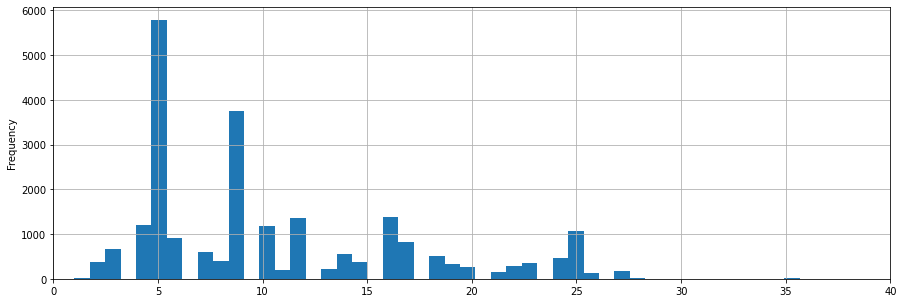

In [10]:
# floors_total всего этажей в доме
researched_data = data['floors_total']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=80, grid=True, xlim=(0, 40))

Пятиэтажки и восьмиэтажки самые распространённые, но есть много предложений и повыше

Медианное значение: 30.0 
Cреднее значение:34.457852427601395


<AxesSubplot:ylabel='Frequency'>

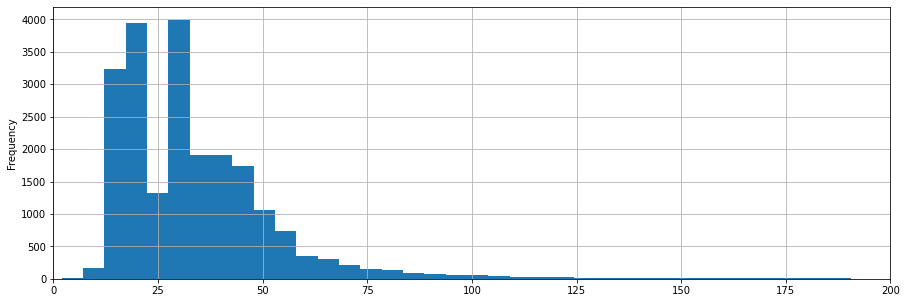

In [11]:
# living_area жилая площадь в квадратных метрах (м²)
researched_data = data['living_area']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=80, grid=True, xlim=(0, 200))

От 10 до 50 м² - основная часть предложений

Медианное значение: 4.0 
Cреднее значение:5.892358327355584


<AxesSubplot:ylabel='Frequency'>

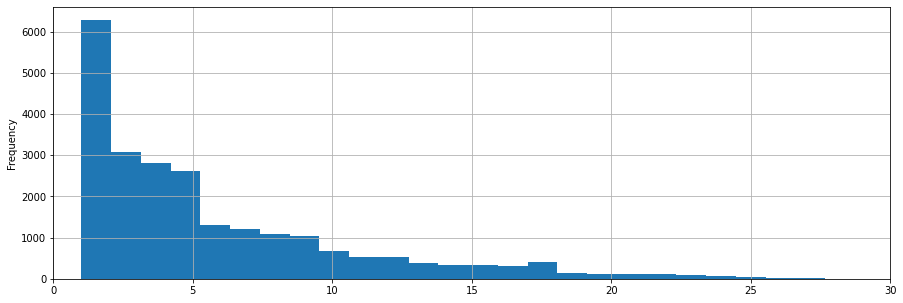

In [12]:
# floor этаж
researched_data = data['floor']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=30, grid=True, xlim=(0, 30))

От 1 до 10 этажа - основная часть предложений, медиана остановилась на четвёртом этаже

Медианное значение: 9.1 
Cреднее значение:10.569807198543485


<AxesSubplot:ylabel='Frequency'>

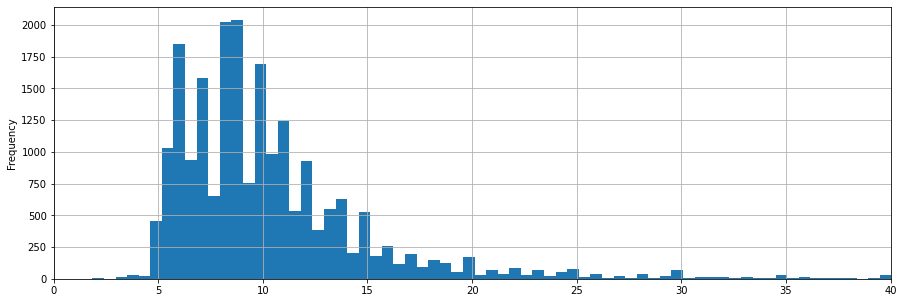

In [13]:
# kitchen_area площадь кухни в квадратных метрах (м²)
researched_data = data['kitchen_area']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=200, grid=True, xlim=(0, 40))

От 5 до 15 м² - самые часто встречающиеся кухни

Медианное значение: 1.0 
Cреднее значение:1.1500821018062397


<AxesSubplot:ylabel='Frequency'>

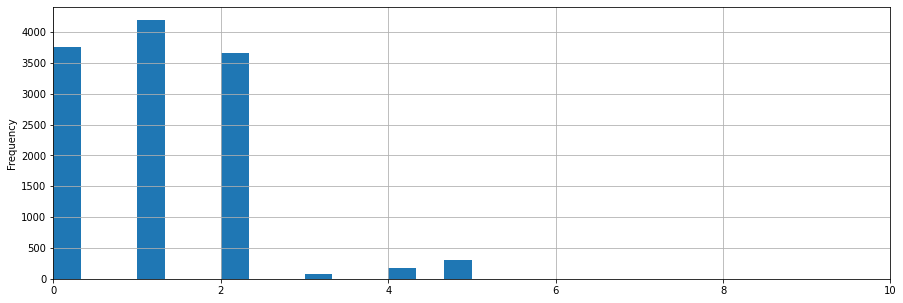

In [14]:
# balcony число балконов
researched_data = data['balcony']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=15, grid=True, xlim=(0, 10))

Редко бывает больше двух балконов, в основном, один

Медианное значение: 26726.0 
Cреднее значение:28793.67219254282


<AxesSubplot:ylabel='Frequency'>

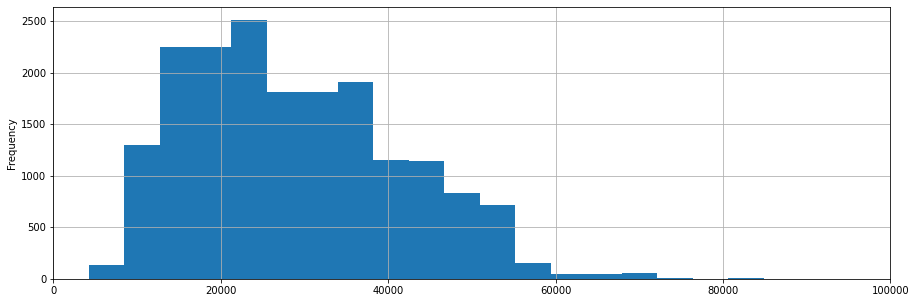

In [15]:
# airports_nearest расстояние до ближайшего аэропорта в метрах (м)
researched_data = data['airports_nearest']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=20, grid=True, xlim=(0, 100000))

В среднем, аэропорт не ближе, чем через 25 км от дома

Медианное значение: 13098.5 
Cреднее значение:14191.277832783278


<AxesSubplot:ylabel='Frequency'>

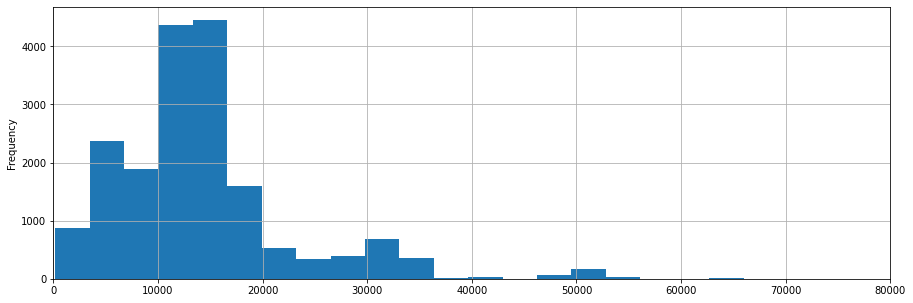

In [16]:
# cityCenters_nearest расстояние до центра города (м)
researched_data = data['cityCenters_nearest']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=20, grid=True, xlim=(0, 80000))

Центр города обычно чуть ближе, чем аэропорт, всего 13 км. Но это точно искажается большим количеством предложений от крупных городов (ниже подробнее посмотрим распределение объявлений по городам)

Медианное значение: 0.0 
Cреднее значение:0.6114075133381002


<AxesSubplot:ylabel='Frequency'>

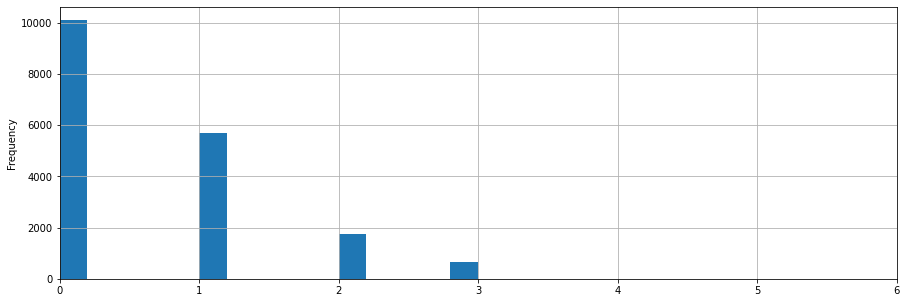

In [17]:
# parks_around3000 число парков в радиусе 3 км
researched_data = data['parks_around3000']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=15, grid=True, xlim=(0, 6))

Покупателю повезёт, если рядом будет хотя бы один парк

Медианное значение: 455.0 
Cреднее значение:490.80455501918556


<AxesSubplot:ylabel='Frequency'>

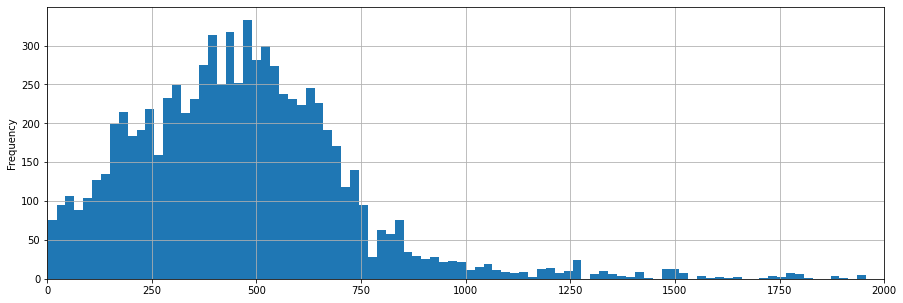

In [18]:
# parks_nearest расстояние до ближайшего парка (м)
researched_data = data['parks_nearest']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=150, grid=True, xlim=(0, 2000))

Если парк и будет рядом, то до него не так далеко идти, в среднем, 0,5 км

Медианное значение: 1.0 
Cреднее значение:0.7702546614597657


<AxesSubplot:ylabel='Frequency'>

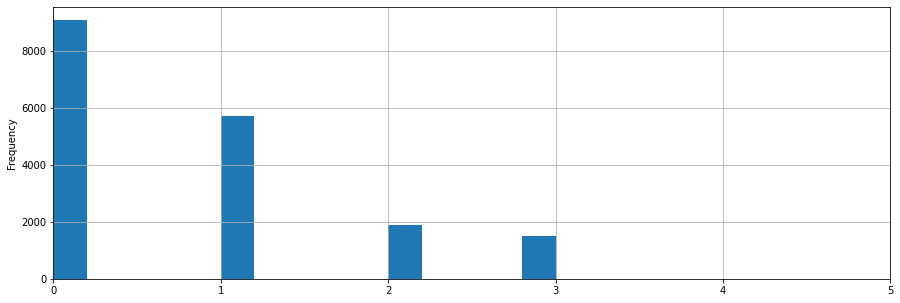

In [19]:
# ponds_around3000 число водоёмов в радиусе 3 км
researched_data = data['ponds_around3000']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=15, grid=True, xlim=(0, 5))

Пруды встречаются чуть чаще парков

Медианное значение: 502.0 
Cреднее значение:517.9809001097694


<AxesSubplot:ylabel='Frequency'>

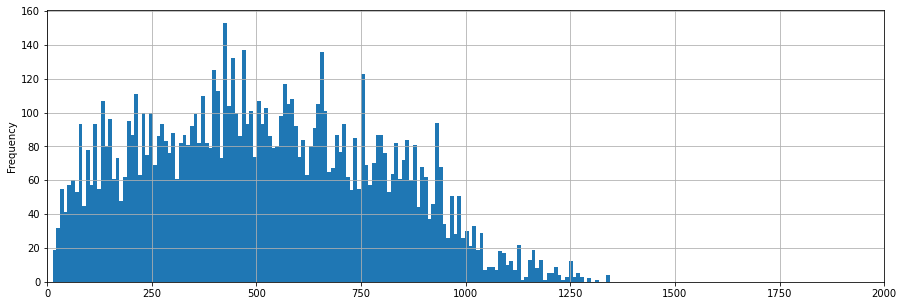

In [20]:
# ponds_nearest расстояние до ближайшего водоёма (м)
researched_data = data['ponds_nearest']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=150, grid=True, xlim=(0, 2000))

А идти до пруда, в среднем, примерно как до парка, 0,5 км

Медианное значение: 95.0 
Cреднее значение:180.88863436982163


<AxesSubplot:ylabel='Frequency'>

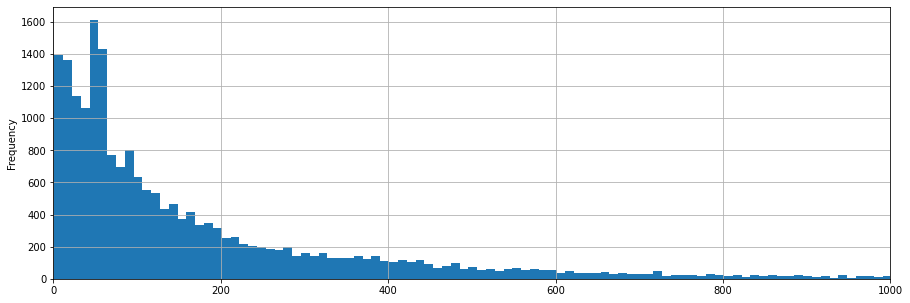

In [21]:
# days_exposition сколько дней было размещено объявление (от публикации до снятия)
researched_data = data['days_exposition']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=150, grid=True, xlim=(0, 1000))

Большая часть квартир продаётся в течение года

In [22]:
# С какими населёнными пунктами работаем:
cities_data = (
    data
    .pivot_table(index='locality_name', values='total_images', aggfunc='count')
    .rename(columns={'total_images': 'count'})
    .sort_values('count', ascending=False)
)
cities_data

,count
locality_name,
Санкт-Петербург,15721
посёлок Мурино,522
посёлок Шушары,440
Всеволожск,398
Пушкин,369
...,...
поселок Каложицы,1
поселок Кирпичное,1
поселок Коммунары,1


<AxesSubplot:xlabel='locality_name'>

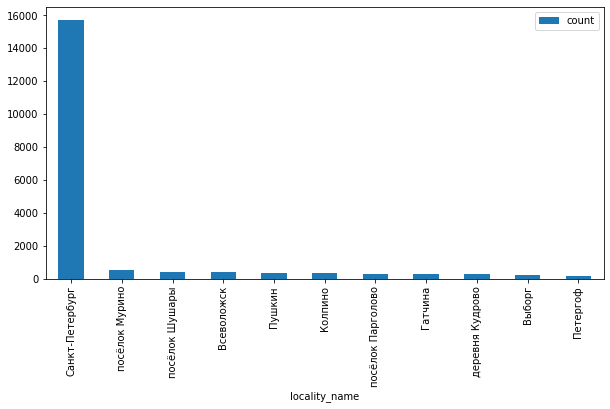

In [23]:
(
    cities_data
    .query('count >  200')
    .plot(y='count', kind='bar', figsize=(10,5))
)

Выборка "Санкт-Петербург и другие", нужно будет обязательно определиться, достаточно ли данных для анализа в других населённых пунктах, кроме Питера.

#### **Итог по разделу**:  
В данных очень много пропусков, после их устранения данные могут измениться, нужно будет ещё раз на них посмотреть. Большую часть выборки составляют предложения в Санкт-Петербурге, нужно оценить на этапе предобработки данных, можно ли считать валидными результаты по другим населённым пунктам. К тому же, из-за того, что предложения от Питера > 60%, стоит данные по нему рассматривать, как минимум, отдельно.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Если тебе так будет удобнее, то можно создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

### Предобработка данных

#### **Заголовки**

Перед дальнейшей работой, поправим заголовки, приведём к общепринятому виду:

In [24]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000' : 'parks_around_3000', 'ponds_around3000' : 'ponds_around_3000' })

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец! Так датафрейм будет более аккуратным
</div>

#### **Пропуски**

Начнём со столбцов, в которых есть пропущенные значения

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего в выборке 23699 записей, значит, пропуски есть в:
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- city_centers_nearest
- parks_around_3000
- parks_nearest
- ponds_around_3000
- ponds_nearest
- days_exposition

Возможные причины пропусков:  
1. Данные не зависят от заполнения пользователем, поэтому пропуски могут быть обусловлены проблемами в работе системы, неправильными дампами или проблемами при их рахворачивании, ошибками в работе СУБД и т.п.
2. Пользователь пропустил заполнение, возможны проблемы на стороне приложения, что ни фронт, ни бек не обработали такое исключение и приняли объявление или так и предполагалось, что значение опционально.  

Ко второй группе можно отнести всё, что не касается географических данных, расстояние до центра, аэропорта и других объектов, количество парков и водоёмов также заполняется без участия пользователя. А к первой группе можно отнести вообще все возможные пропуски, т.е. даже если пользователь заполнил всё полностью, это не значит, что пропуски не могут появиться дальше.

Перейдём к обработке:

In [26]:
# ceiling_height

# Заполним пропуски меданными значениями
median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(median)
data['ceiling_height'].head()

0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
Name: ceiling_height, dtype: float64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением для столбца с высотой потолков, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

Медиана составила 2.65 м, значение выглядит корректно и может быь использовано для заполнения пропусков

In [27]:
# floors_total

# Пропусков очень мало (< 100), снова воспользуемся медианой
# median = data['floors_total'].median()
# data['floors_total'] = data['floors_total'].fillna(median)

# исправление после ревью v1
# Пропусков очень мало (< 100), примем этажность за этаж квартиры во избежание ситуаций, когда floors_total < floor
data['floors_total'] = data['floors_total'].fillna(data['floor'])
data['floors_total'].head()

0    16.0
1    11.0
2     5.0
3    14.0
4    14.0
Name: floors_total, dtype: float64

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если мы заполняем таким способом, то нужно делать проверку, а не превышает ли этаж, на котором квартира общую этажность? Можно заменить на этаж квартиры либо оставить как есть
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Поправила
</div>

Медиана составила 9.0, это значение стало показателем для 86 записей, это примерно 0,4% от всей выборки, поэтому даже если показатель далёк от истины для этих объявлений, он не испортит общую картину

In [28]:
# living_area

# Снова воспользуемся медианой
# median = data['living_area'].median()
# data['living_area'] = data['living_area'].fillna(median)

# исправление после ревью v1
# 1903 nan-ов, 8% пропусков в data['living_area']
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].median())
print(data['living_area'].head())

# kitchen_area

# Снова воспользуемся медианой
# median = data['kitchen_area'].median()
# data['kitchen_area'] = data['kitchen_area'].fillna(median)

# исправление после ревью v1
# 2279 nan-ов, 9.6% пропусков в data['kitchen_area']
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].median())
print(data['kitchen_area'].head())

def check_total_area(living_area, kitchen_area, total_area):
    # это метод, который решает проблему, когда (kitchen_area + living_area) != total_area    
    if (kitchen_area + living_area) > total_area:
        # найдём соотношение living_area и kitchen_area
        ratio = kitchen_area / living_area
        # находим площадь превышения
        excess = (kitchen_area + living_area) - total_area
        
        # согласно соотношению living_area и kitchen_area, отнимаем от них проценты превышения
        kitchen_area = kitchen_area - excess * ratio
        living_area = kitchen_area - excess * (1 - ratio)
        if kitchen_area <= 0 or living_area <= 0:
            # специально присваиваем NaN, чтобы потом удалить такие значения
            kitchen_area = np.NaN
            living_area = np.NaN
    
    if (kitchen_area + living_area) < total_area:
        # прибавим разницу к living_area
        living_area = living_area + (total_area - (kitchen_area + living_area))
        
    # если ни одно условие не сработало, возвращаем изначальные данные
    #return round(living_area, 2), round(kitchen_area, 2)
    return pd.Series([round(living_area, 2), round(kitchen_area, 2)])


# не смогла отладить вызов метода выше, получаю ошибку "Must have equal len keys and value when setting with an iterable"
# без этой обработки данные не будут сильно искажены, поэтому, пока оставляю в таком варианте
data[['living_area', 'kitchen_area']] = (
    data
    .apply(lambda x: check_total_area(x.living_area, x.kitchen_area, x.total_area), axis=1)
)
# убираем записи, которые не получилось корректно обработать и kitchen_area <= 0 or living_area <= 0
data = data.dropna(subset=['living_area', 'kitchen_area']).reset_index(drop=True)

0    51.0
1    18.6
2    34.3
3    45.0
4    32.0
Name: living_area, dtype: float64
0    25.0
1    11.0
2     8.3
3     9.5
4    41.0
Name: kitchen_area, dtype: float64


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Заполняя пропуски в столбцах living_area и kitchen_area одним значением необходимо проверить чтобы жилая(кухонная) площадь не была больше общей. Лучше использовать группировку по количеству комнат или вообще не заменять пропуски.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Поправила, теперь обработка living_area и kitchen_area происходят в одном блоке, вывод по ним ниже обновила
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>👍
</div>

~~Медиана составила 30.0, выглядит корректно~~
~~Кухни 9.1 м², действительно самый ходовой вариант, для планировок, когда кухня - отдельное помещение, не совмещённое с гостиной ~~  

*Исправление после ревью v1*  
Заполнение происходит медианными значениями, сгруппироваными по rooms ~~, а далее результаты обрабатывает метод, который удаляет не соотвествие kitchen_area + living_area != total_area ~~


In [29]:
# is_apartment

# Это булево значение, поэтому примем NaN за False
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_apartment, dtype: bool

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Доля апартаментов, в целом, меньше, чем у обычных жилых помещений, поэтому приняли False для NaN

In [30]:
# balcony

# Примем 0 за значение для NaN
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].head()

0    0.0
1    2.0
2    0.0
3    0.0
4    0.0
Name: balcony, dtype: float64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Если число балконов не указано, скорее всего, их нет

In [31]:
# locality_name

# Удаляем записи без указания населённого пункта и поправляем индексы
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data['locality_name'].head()

0    Санкт-Петербург
1     посёлок Шушары
2    Санкт-Петербург
3    Санкт-Петербург
4    Санкт-Петербург
Name: locality_name, dtype: object

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Удалить пропуски в столбце locality_name - это хорошее решение. 
</div>

У 49 записей в выборке не указан населённый, это 0,2%, мы не можем определить, что это за предложения, поэтому, пожертвуем этими данными

In [32]:
# airports_nearest

# Снова воспользуемся медианой
# median = data['airports_nearest'].median()
# data['airports_nearest'] = data['airports_nearest'].fillna(median)

# Заполняем пропуски 0
data['airports_nearest'] = data['airports_nearest'].fillna(value=0)
data['airports_nearest'].head()

0    18863.0
1    12817.0
2    21741.0
3    28098.0
4    31856.0
Name: airports_nearest, dtype: float64

~~Медиана составила 26726.0 м,  выглядит корректно~~

In [33]:
# city_centers_nearest

# Снова воспользуемся медианой
# median = data['city_centers_nearest'].median()
# data['city_centers_nearest'] = data['city_centers_nearest'].fillna(median)

# Заполняем пропуски 0
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(value=0)
data['city_centers_nearest'].head()

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
Name: city_centers_nearest, dtype: float64

~~Медиана составила 13098.5 м, выглядит корректно, учитывая что основной город в выборке Питер~~

In [34]:
# parks_around_3000

# Снова воспользуемся медианой
# median = data['parks_around_3000'].median()
# data['parks_around_3000'] = data['parks_around_3000'].fillna(median)

# Заполняем пропуски 0
data['parks_around_3000'] = data['parks_around_3000'].fillna(value=0)
data['parks_around_3000'].head()

0    1.0
1    0.0
2    1.0
3    2.0
4    2.0
Name: parks_around_3000, dtype: float64

~~Медиана составила 0.0, выглядит корректно~~

In [35]:
# parks_nearest

# Снова воспользуемся медианой
# median = data['parks_nearest'].median()
# data['parks_nearest'] = data['parks_nearest'].fillna(median)

# Заполняем пропуски 0
data['parks_nearest'] = data['parks_nearest'].fillna(value=0)
data['parks_nearest'].head()

0    482.0
1      0.0
2     90.0
3     84.0
4    112.0
Name: parks_nearest, dtype: float64

~~Медиана составила 455.0 м, выглядит корректно~~

In [36]:
# ponds_around_3000

# Снова воспользуемся медианой
# median = data['ponds_around_3000'].median()
# data['ponds_around_3000'] = data['ponds_around_3000'].fillna(median)

# Заполняем пропуски 0
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(value=0)
data['ponds_around_3000'].head()

0    2.0
1    0.0
2    2.0
3    3.0
4    1.0
Name: ponds_around_3000, dtype: float64

~~Медиана составила 1.0, выглядит корректно~~

In [37]:
# ponds_nearest

# Снова воспользуемся медианой
# median = data['ponds_nearest'].median()
# data['ponds_nearest'] = data['ponds_nearest'].fillna(median)

# Заполняем пропуски 0
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=0)
data['ponds_nearest'].head()

0    755.0
1      0.0
2    574.0
3    234.0
4     48.0
Name: ponds_nearest, dtype: float64

~~Медиана составила 502.0 м, выглядит корректно~~

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбцах с картографическими данными лучше не трогать. Заполняя их таким образом, ты проставляешь одинаковые расстояния до центра (парка, прудов, аэропорта) для разных квартир, хотя они могут быть расположены в разных частях города. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Поправила, но всё же заполнила нулями, чтобы дальше с типами не возникало проблем
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Можно изменить тип данных без замены пропусков следующим образом
    
    import numpy as np
    df['col'] = np.floor(pd.to_numeric(df['col'], errors='coerce')).astype('Int64')
</div>

In [38]:
# days_exposition

# Снова воспользуемся медианой
#median = data['days_exposition'].median()
#data['days_exposition'] = data['days_exposition'].fillna(median)

# исправления после ревью v1
# Заполняем пропуски 0, дальше эта аномалия будет видна и не будет мешать исследованию
data['days_exposition'] = data['days_exposition'].fillna(value=0)
data['days_exposition'].head()

0      0.0
1     81.0
2    558.0
3    424.0
4    121.0
Name: days_exposition, dtype: float64

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Если тут пропуск, то значит квартира не продана. Эти пропуски заполнять или удалять не нужно
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Поправила, но всё же заполнила нулями, чтобы дальше с типами не возникало проблем
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍 Если заполняешь нулями или заглушками, то потом важно их убирать при анализе
</div>

~~Медиана составила 95.0 дней, выглядит корректно, около 3 месяцев~~  

Если тут пропуск, то значит квартира не продана. Эти пропуски заполнять или удалять не нужно

Проверяем как быглядят данные теперь:

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20945 entries, 0 to 20944
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20945 non-null  int64  
 1   last_price            20945 non-null  float64
 2   total_area            20945 non-null  float64
 3   first_day_exposition  20945 non-null  object 
 4   rooms                 20945 non-null  int64  
 5   ceiling_height        20945 non-null  float64
 6   floors_total          20945 non-null  float64
 7   living_area           20945 non-null  float64
 8   floor                 20945 non-null  int64  
 9   is_apartment          20945 non-null  bool   
 10  studio                20945 non-null  bool   
 11  open_plan             20945 non-null  bool   
 12  kitchen_area          20945 non-null  float64
 13  balcony               20945 non-null  float64
 14  locality_name         20945 non-null  object 
 15  airports_nearest   

Отлично, пропусков больше нет

#### **Типы данных**

С пропусками разобрались, теперь нужно поправить типы данных для удобства работы. Типы для каких столбцов будем менять и почему:
- first_day_exposition переведём в тип дата/время, тут пояснения излишни
- floors_total приведём к целочисленному типу, т.к. этажи целые
- balcony приведём к целочисленному типу, т.к. не бывает 1.5 балкона и т.п.
- parks_around_3000 приведём к целочисленному типу, т.к. парки считают целыми единицами
- ponds_around_3000 приведём к целочисленному типу, аналогично, как с парками
- days_exposition приведём к целочисленному типу, т.к.интересует целое кол-во дней

In [40]:
# first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [41]:
# floors_total
data['floors_total'] = data['floors_total'].astype('int')

In [42]:
# balcony
data['balcony'] = data['balcony'].astype('int')

In [43]:
# parks_around_3000
data['parks_around_3000'] = data['parks_around_3000'].astype('int')

In [44]:
# ponds_around_3000
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')

In [45]:
# days_exposition
data['days_exposition'] = data['days_exposition'].astype('int')

Проверим, какие типы у данных теперь:

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20945 entries, 0 to 20944
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20945 non-null  int64         
 1   last_price            20945 non-null  float64       
 2   total_area            20945 non-null  float64       
 3   first_day_exposition  20945 non-null  datetime64[ns]
 4   rooms                 20945 non-null  int64         
 5   ceiling_height        20945 non-null  float64       
 6   floors_total          20945 non-null  int64         
 7   living_area           20945 non-null  float64       
 8   floor                 20945 non-null  int64         
 9   is_apartment          20945 non-null  bool          
 10  studio                20945 non-null  bool          
 11  open_plan             20945 non-null  bool          
 12  kitchen_area          20945 non-null  float64       
 13  balcony         

Порядок, идём дальше

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно. Можно ещё заменить тип данных с float64 на float32 для экономии памяти.
</div>

#### **Дубликаты**

##### **Не явные**

Начнём с не явных, в данном датасете дублироваться могут только названия населённых пунктов, оценим, какие вообще есть и обработаем их названия, чтобы получить одно название для одного населённого пункта

In [47]:
print(f"Кол-во вариантов населённых пунктов до обработки: {data['locality_name'].value_counts().count()}")
data['locality_name'] = (
    data['locality_name']
    #.str.lower() # было убрано, т.к. не влияло на результат убранных дубликатов
    .replace('ё', 'е', regex=True)
    .replace(['городской', 'городского', 'типа'], '', regex=True)
    .replace(['   ', '  '], '', regex=True)
    .str.strip()
)

print(f"Кол-во вариантов населённых пунктов после обработки: {data['locality_name'].value_counts().count()}")

Кол-во вариантов населённых пунктов до обработки: 345
Кол-во вариантов населённых пунктов после обработки: 311


34 дубликата были убраны после обработки

##### **Явные**

Осталось удалить явные дубликаты:

In [48]:
# Проверим, есть ли такие
print(f'Явные дубликаты до обработки:{data.duplicated().sum()}')
# data = data.drop_duplicates().reset_index(drop=True)
# print(f'Явные дубликаты после обработки:{data.duplicated().sum()}')

Явные дубликаты до обработки:0


Т.к. явные дубликаты не найдены, можем переходить к следующему этапу

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

#### **Аномалии**

Теперь отсечём аномалии, которые могут искажать общий результат. Будем ориентироваться на исследования в ячейках 4-23. Начнём с населённых пунктов, Питер выделим отдельно от остальных, т.к. он сильно влияет на общие показатели

In [49]:
saint_petersburg = data.loc[data['locality_name'] == 'Санкт-Петербург']
other = data.loc[data['locality_name'] != 'Санкт-Петербург']
print(f"Кол-во предложений по Санкт-Петербургу: {saint_petersburg['locality_name'].count()}\nКол-во предложений по прочим городам: {other['locality_name'].count()}")

Кол-во предложений по Санкт-Петербургу: 14073
Кол-во предложений по прочим городам: 6872


Рассмотрим данные по этим двум категориям по отдельности подробнее:

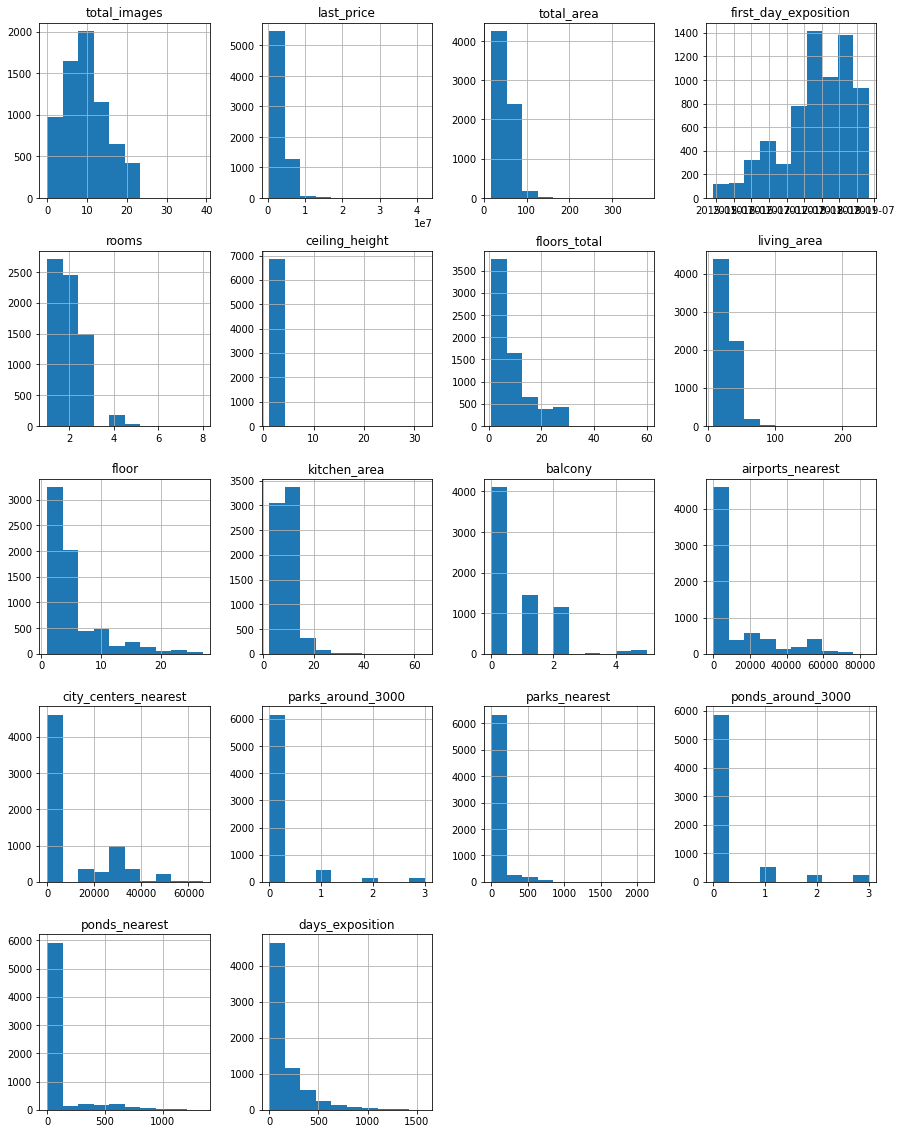

In [50]:
other.hist(figsize=(15, 20));

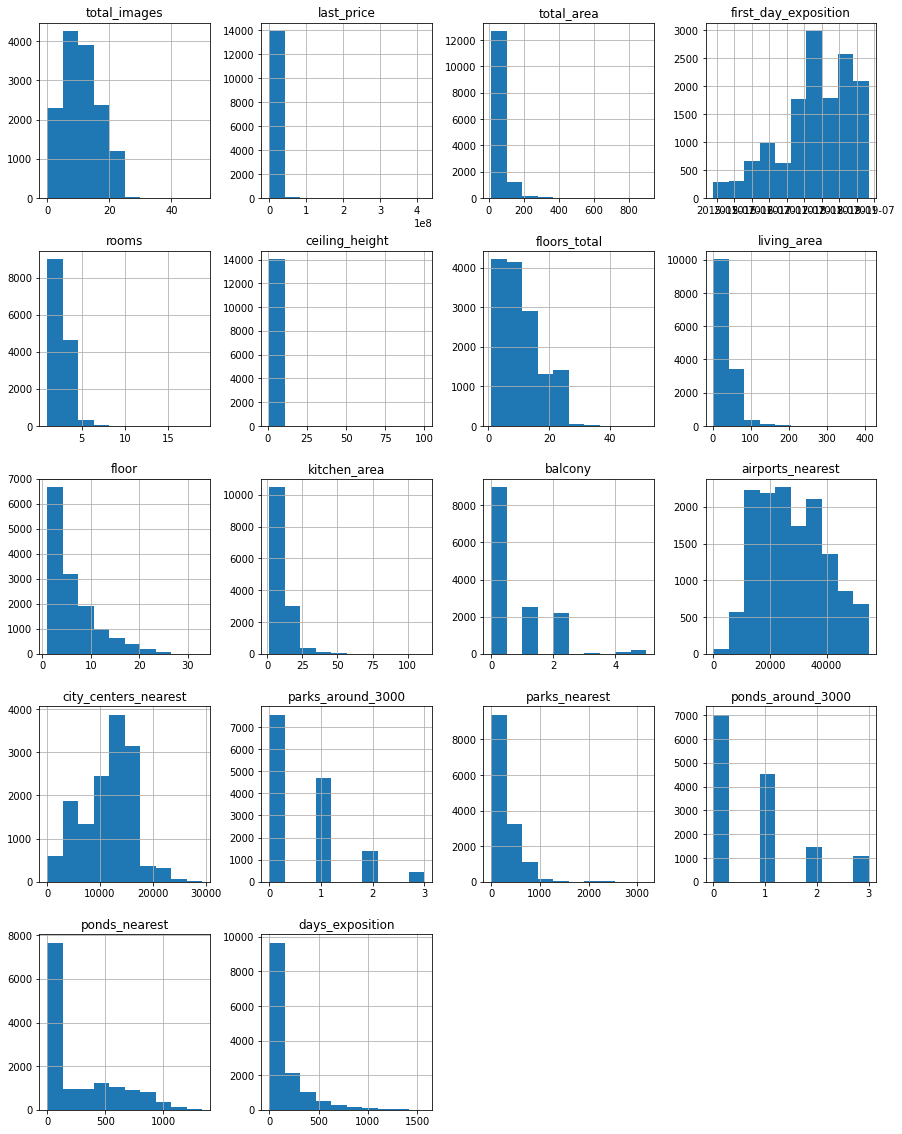

In [51]:
saint_petersburg.hist(figsize=(15, 20));

Отдельное внимание на разброс стоимости предложений:

Медианное значение: 5500000.0 
Cреднее значение:7936366.879272366


<AxesSubplot:ylabel='Frequency'>

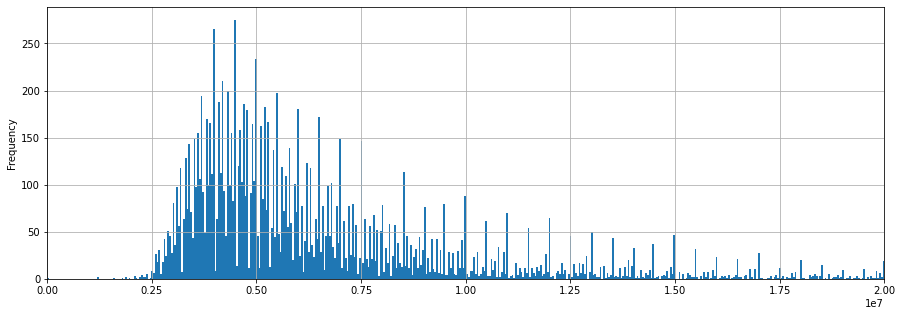

In [52]:
researched_data = saint_petersburg['last_price']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=10000, grid=True, xlim=(0, 20000000))

Медианное значение: 3242000.0 
Cреднее значение:3587062.1523573925


<AxesSubplot:ylabel='Frequency'>

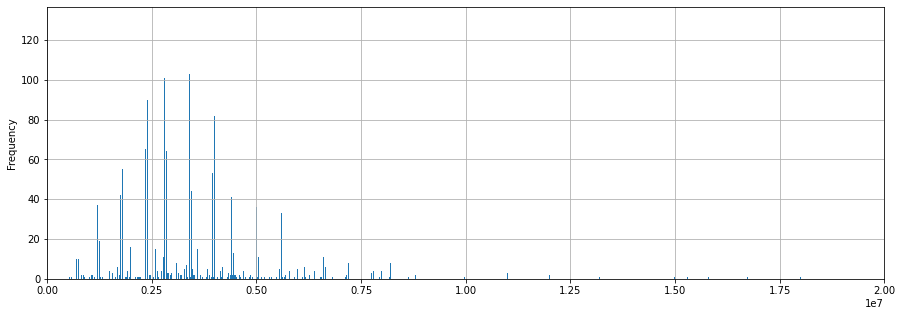

In [53]:
researched_data = other['last_price']

print(f'Медианное значение: {researched_data.median()} \nCреднее значение:{researched_data.mean()}')
researched_data.plot(y=researched_data, kind='hist', figsize=(15, 5), bins=10000, grid=True, xlim=(0, 20000000))

Существенные различия наблюдаются только в географических данных и в ценовых, что вполне ожидаемо для большого города и городов более маленьких, значит, нет смысла разделять выборку, т.к. наверняка есть зависимость от географической доступности. На этапе исследовательского анализа проверим эту гипотезу

Перейдём к численным аномалиям:

In [54]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,20945.000000,2.094500e+04,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000
mean,10.084794,6.509371e+06,60.537748,2.095440,2.723057,10.565051,34.641421,5.849463,10.515247,0.619002,22368.698066,11084.152399,0.475818,168.919312,0.593793,200.386918,159.929530
std,5.676677,9.607641e+06,34.514815,1.064664,0.995725,6.519113,21.936193,4.825915,5.843240,0.969986,16366.446912,9665.943669,0.750986,305.515100,0.885651,306.019356,215.820258
min,0.000000,1.219000e+04,14.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.500000e+06,40.500000,1.000000,2.600000,5.000000,18.800000,2.000000,7.000000,0.000000,10934.000000,3042.000000,0.000000,0.000000,0.000000,0.000000,21.000000
50%,10.000000,4.700000e+06,52.200000,2.000000,2.650000,9.000000,30.100000,4.000000,9.000000,0.000000,22041.000000,11432.000000,0.000000,0.000000,0.000000,0.000000,78.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,15.000000,42.500000,8.000000,12.000000,1.000000,34519.000000,15307.000000,1.000000,309.000000,1.000000,393.000000,205.000000
max,50.000000,4.200000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Сначала нужно детальнее посмотреть на:
- total_area
- rooms
- ceiling_height
- living_area
- kitchen_area
т.к. максимальные данные в этих столбцах выглядят не очень реалистично

<AxesSubplot:ylabel='Frequency'>

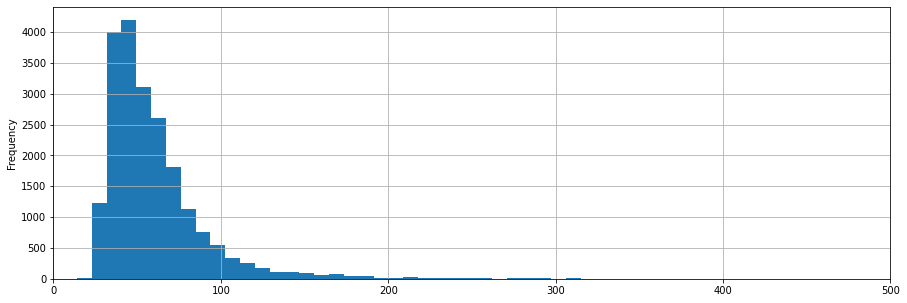

In [55]:
# total_area
data['total_area'].plot(y=data['total_area'], kind='hist', figsize=(15, 5), bins=100, grid=True, xlim=(0, 500))

Можем отсечь варианты, где total_area >= 200

<AxesSubplot:ylabel='Frequency'>

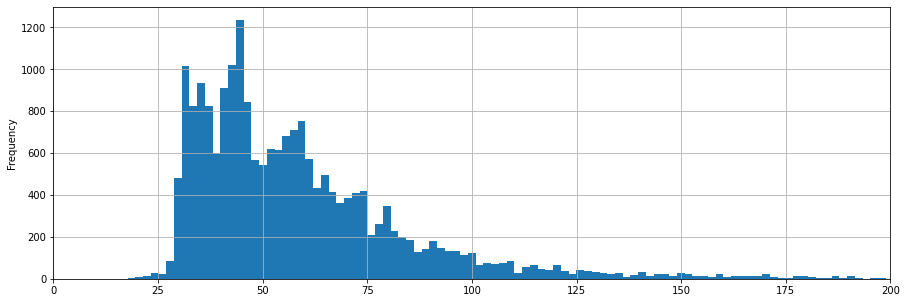

In [56]:
good_data = data.query('total_area < 200')
good_data['total_area'].plot(y=good_data['total_area'], kind='hist', figsize=(15, 5), bins=100, grid=True, xlim=(0, 200))

rooms
2     7109
1     7069
3     5249
4     1020
5      227
6       56
7       19
8        2
11       2
dtype: int64

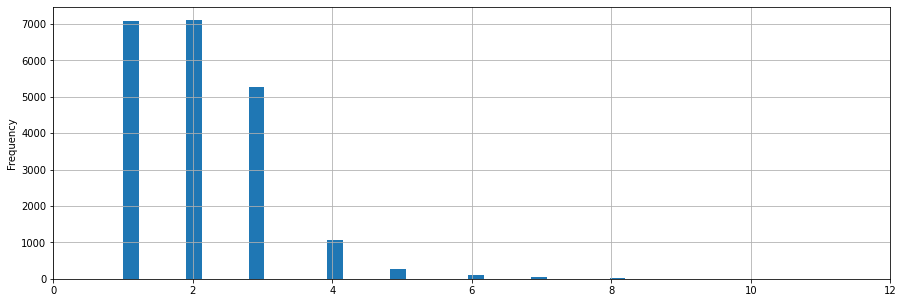

In [57]:
# rooms
data['rooms'].plot(y=data['rooms'], kind='hist', figsize=(15, 5), bins=80, grid=True, xlim=(0, 12))

good_data.value_counts('rooms')

Пожалуй, 8 и 11 комнат - уже не очень типично, исключим эти 4 предложения. С другой стороны гистограммы, предложения с 0 комнат. Либо так описали студии, где комната всего одна и она же кухня, либо это какая-то ошибка. Т.к. таких 194 предложения, сделаем из них однушки.

rooms
2    7109
1    7069
3    5249
4    1020
5     227
6      56
7      19
dtype: int64


<AxesSubplot:ylabel='Frequency'>

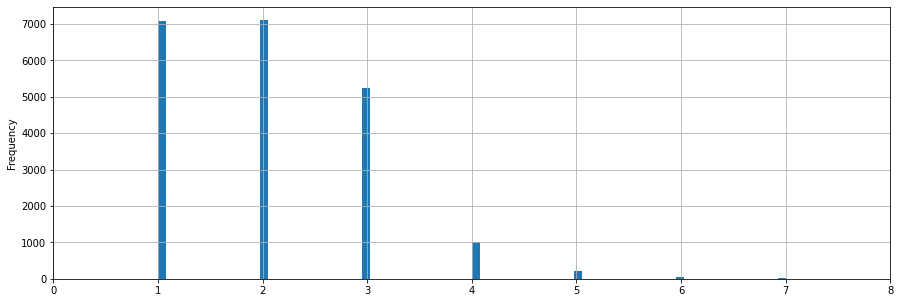

In [58]:
good_data = (
    good_data
    .query('rooms < 8')
    .replace(0, 1)
)
print(good_data.value_counts('rooms'))

good_data['rooms'].plot(y=good_data['rooms'], kind='hist', figsize=(15, 5), bins=80, grid=True, xlim=(0, 8))

Выглядит уже более правдоподобно, смотрим дальше

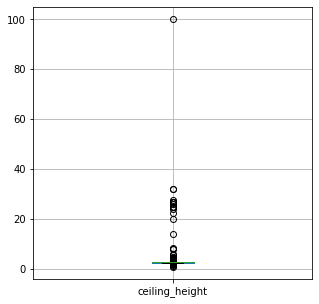

In [59]:
# ceiling_height

good_data['ceiling_height'].plot(y=good_data['ceiling_height'], kind='box', figsize=(5, 5), grid=True)
# не очень наглядно, но 100 м для потолка многовато, но есть и другие довольно большие показатели, что более 5 м, это отсечём
good_data = good_data.query('ceiling_height < 5')

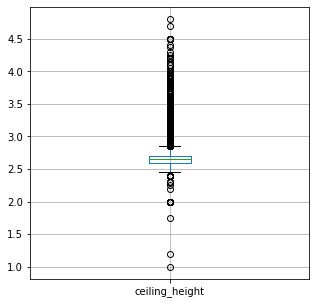

In [60]:
good_data['ceiling_height'].plot(y=good_data['ceiling_height'], kind='box', figsize=(5, 5), grid=True)
# Уже лучше видно распределение
# Сегодня минимальной нормой в России считается высота потолка 2,4 метра (согласно нагугленному), поэтому малые значения тоже убираем
good_data = good_data.query('ceiling_height >= 2.4')

<AxesSubplot:>

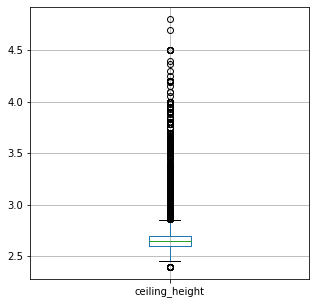

In [61]:
good_data['ceiling_height'].plot(y=good_data['ceiling_height'], kind='box', figsize=(5, 5), grid=True)


<AxesSubplot:ylabel='Frequency'>

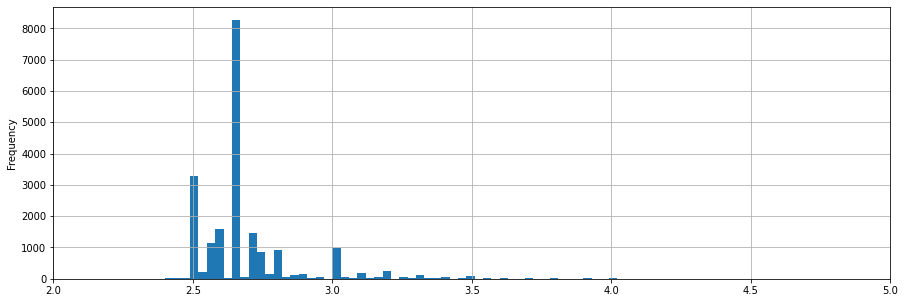

In [62]:
good_data['ceiling_height'].plot(y=good_data['ceiling_height'], kind='hist', figsize=(15, 5), bins=80, grid=True, xlim=(2, 5))

Теперь выбивающихся значений нет

<AxesSubplot:>

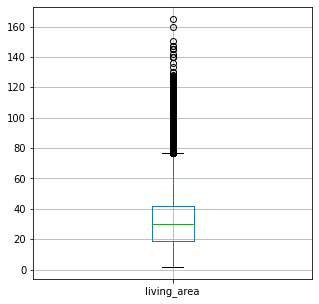

In [63]:
# living_area
good_data['living_area'].plot(y=good_data['living_area'], kind='box', figsize=(5, 5), grid=True)

<AxesSubplot:ylabel='Frequency'>

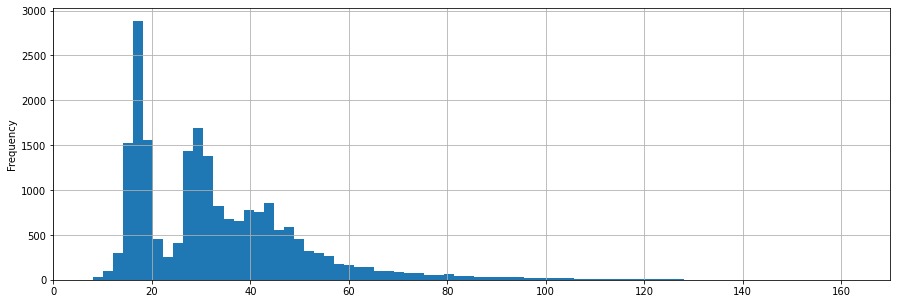

In [64]:
good_data['living_area'].plot(y=good_data['living_area'], kind='hist', figsize=(15, 5), bins=80, grid=True, xlim=(0, 170))

Ярких артефактов нет, есть отдельные большие предложения, можем отбросить варианты > 120

<AxesSubplot:>

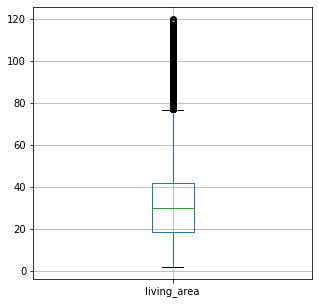

In [65]:
good_data = good_data.query('living_area < 120')
good_data['living_area'].plot(y=good_data['living_area'], kind='box', figsize=(5, 5), grid=True)

<AxesSubplot:>

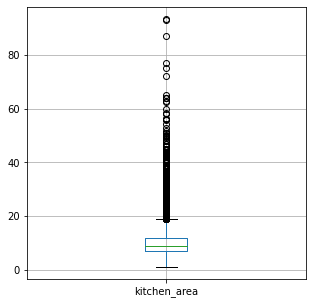

In [66]:
# kitchen_area
good_data['kitchen_area'].plot(y=good_data['kitchen_area'], kind='box', figsize=(5, 5), grid=True)

<AxesSubplot:ylabel='Frequency'>

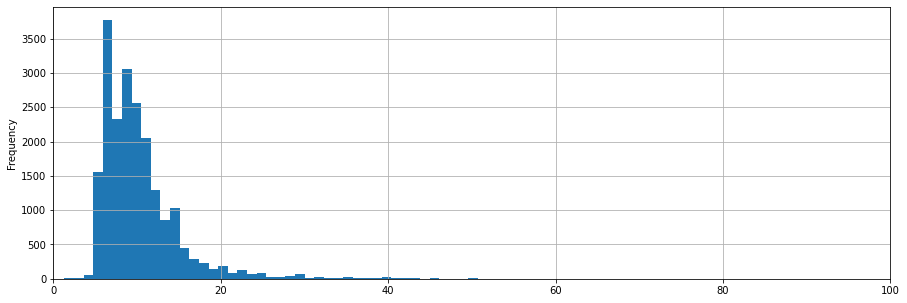

In [67]:
good_data['kitchen_area'].plot(y=good_data['kitchen_area'], kind='hist', figsize=(15, 5), bins=80, grid=True, xlim=(0, 100))

Больше 60 для кухни много и встречается редко, поэтому ничего не теряем, если отсечём такие предложения

<AxesSubplot:>

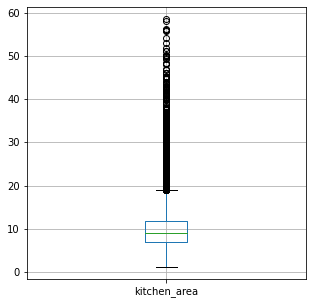

In [68]:
good_data = good_data.query('kitchen_area < 60')
good_data['kitchen_area'].plot(y=good_data['kitchen_area'], kind='box', figsize=(5, 5), grid=True)

Посмотрим на показатели ещё раз:

In [69]:
good_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,20645.000000,2.064500e+04,20645.000000,20645.000000,20645.000000,20645.000000,20645.000000,20645.000000,20645.000000,20645.000000,20645.000000,20645.000000,20645.000000,20645.000000,20645.000000,20645.000000,20645.000000
mean,10.103415,5.987266e+06,58.183776,2.050908,2.691607,10.619714,33.190495,5.865343,10.276283,1.245435,22348.828385,11142.564543,1.124437,168.246210,1.202664,200.229499,159.255994
std,5.585824,5.973651e+06,25.395077,0.962670,0.207405,6.526070,16.637221,4.837896,5.043326,0.631987,16431.682500,9681.525540,0.400138,304.962931,0.533514,305.932760,214.477580
min,1.000000,1.219000e+04,14.000000,1.000000,2.400000,1.000000,2.000000,1.000000,1.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,3.500000e+06,40.200000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,1.000000,10823.000000,3066.000000,1.000000,1.000000,1.000000,1.000000,21.000000
50%,10.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,1.000000,21937.000000,11525.000000,1.000000,1.000000,1.000000,1.000000,78.000000
75%,14.000000,6.699000e+06,69.000000,3.000000,2.700000,15.000000,42.000000,8.000000,11.800000,1.000000,34631.000000,15363.000000,1.000000,304.000000,1.000000,391.000000,203.000000
max,50.000000,3.300000e+08,198.900000,7.000000,4.800000,60.000000,119.900000,33.000000,58.400000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Было 23650 записей, стало 23298, потери составили 1.5%, это не критично, но итоги станут более объективными.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Диапазоны для аномальных значений подобраны и удалены верно! Молодец, что проверяешь количество отброшенных данных
</div>

### Подсчёт и добавление новых столбцов

Нужно добавить в таблицу новые столбцы, которые помогут разделить предложения на комплекс категорий:  
- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [70]:
# цена одного квадратного метра

good_data['cost_per_meter'] = (good_data['last_price'] / good_data['total_area']).round(2)

In [71]:
# день недели публикации объявления

good_data['publication_weekday'] = good_data['first_day_exposition'].dt.weekday

In [72]:
# месяц публикации объявления

good_data['publication_month'] = good_data['first_day_exposition'].dt.month

In [73]:
# год публикации объявления

good_data['publication_year'] = good_data['first_day_exposition'].dt.year

In [74]:
# тип этажа квартиры

def detect_floor_type(floor, floors_total):
    if floor == floors_total:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'

good_data['floor_type'] = good_data.apply(lambda x: detect_floor_type(x.floor, x.floors_total), axis=1)

In [75]:
# расстояние до центра города в километрах

good_data['distance_to_center'] = (good_data['city_centers_nearest'] / 1000).round().astype('int')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

Дополнительно разделим предложения по категориям: 'центр города', 'средняя черта города', 'окраина города', 'пригород', 'область'. Это поможет посмотреть зависимость стоимости от удаления от центра. В ячейках 50-54 уже было такое разделение, но более грубое.  
- центр города - это самые близкие к центру предложения, где locality_name == 'Санкт-Петербург'
- средняя черта города - это предложения между центром города и окраиной, где locality_name == 'Санкт-Петербург'
- окраина города - это самые далёкие от центра предложения, где locality_name == 'Санкт-Петербург'
- пригород - это предложения между окраиной города и областью, где locality_name != 'Санкт-Петербург'
- область - это самые далёкие от центра предложения, где locality_name != 'Санкт-Петербург'

Определим границы этих категорий:

In [76]:
good_data.query("locality_name == 'Санкт-Петербург'")['distance_to_center'].value_counts().sort_index(ascending=True)

0       61
1      153
2      253
3      298
4      585
5      760
6      482
7      369
8      524
9      529
10     638
11    1072
12    1449
13    1317
14    1165
15    1418
16    1139
17     776
18     233
19     145
20      44
21      88
22     165
23      73
24      22
25      16
26      26
27       2
28       7
29       5
Name: distance_to_center, dtype: int64

In [77]:
good_data.query("locality_name != 'Санкт-Петербург'")['distance_to_center'].value_counts().sort_index(ascending=True)

0     4581
17      21
18     109
19     177
20      63
21      38
22      17
23      32
24      82
25      42
26      60
27      94
28      90
29     113
30     196
31     265
32     132
33     128
34     166
35      92
36      34
37      12
39       3
40      16
41       6
42       5
43       4
47      27
48       8
49      27
50      47
51      47
52      56
53      24
54       3
55       2
57       1
59       1
60       2
61       1
62       1
63       1
65       2
66       3
Name: distance_to_center, dtype: int64

Есть пересечение предложений в Питере и в остальных населённых пунктах на 13-29 км, значит, условие, определённое выше не может быть корректным.


In [78]:
km_range = range(13, 29)
good_data.query("distance_to_center in @km_range")['locality_name'].value_counts().sort_index(ascending=True).count()

11

In [79]:
# Города, которые не пересекаются с Питером
km_range = range(30, 66)
good_data.query("distance_to_center in @km_range")['locality_name'].value_counts().sort_index(ascending=True)

Зеленогорск            23
Колпино               317
Красное Село           71
Кронштадт              87
Ломоносов             123
Павловск               35
Петергоф              189
Пушкин                140
Сестрорецк            165
поселок Белоостров      1
поселок Молодежное      2
поселок Понтонный      16
поселок Репино          2
поселок Саперный        6
поселок Шушары        132
Name: locality_name, dtype: int64

У 319 населённых пунктов (318, если не считать Питер) есть объявления, для которых удалённость от центра от 13 до 29 км. Нужно скорректировать условие для окраины и пригорода

Есть пересечение предложений с Питере и остальных населённых пунктах на 13-29 км.

В черте города (locality_name == 'Санкт-Петербург') примем:
- 0-10 км центр
- 11-19 км средняя черта
- 20 и более км окраина  

За чертой города (locality_name != 'Санкт-Петербург') примем:
- до 29 км пригород
- 30 и более км область

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Так как это учебный проект, то так сделать можно, но вообще с такими категоризациями нужно быть осторожнее, так как они не привязаны к какому-то стандарты, а от того как ты определишь категории будут зависеть результаты
</div>

In [80]:
# Функция для заполнения категорий расположения:

def set_part_of_the_region(locality_name, distance_to_center):
    if locality_name == 'Санкт-Петербург':
        if distance_to_center <= 10:
            return 'центр города'
        elif 11 <= distance_to_center <= 19:
            return 'средняя черта города'
        elif 20 <= distance_to_center:
            return 'окраина города'
        else:
            return 'ошибка'
    else:
        if distance_to_center <= 29:
            return 'пригород'
        elif 30 <= distance_to_center:
            return 'область'
        else:
            return 'ошибка'

In [81]:
good_data['part_of_the_region'] = good_data.apply(lambda x: set_part_of_the_region(x.locality_name, x.distance_to_center), axis=1)
good_data['part_of_the_region'].value_counts()

средняя черта города    8714
пригород                5519
центр города            4652
область                 1312
окраина города           448
Name: part_of_the_region, dtype: int64

Добавили в датафрейм новые столбцы:
- cost_per_meter - стоимтость м² (float)
- publication_weekday - номер дня недели публикации (dt)
- publication_month - номер месяца публикации (dt)
- publication_year - год публикации (dt)
- floor_type - категория этажа (последний, первый, другой) (str)
- distance_to_center - км до центра (int)
- part_of_the_region - категории расположения (центр города, средняя черта города, окраина города, пригород, область) (str)

Они помогут при проведении исследовательского анализа данных

### Исследовательский анализ данных

Изучим ещё раз паремтры в разрезах категорий расположения:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

In [82]:
# функция для автоматизации построения сравнительных гистограм
def hist_by_part_of_the_region(param_to_hist):
    parts_of_the_region = ['центр города', 'средняя черта города', 'окраина города', 'пригород', 'область']
    plt.figure(figsize=(30, 15))
    plt.title(label='Распределение '+param_to_hist+' по каждому региону', fontsize=26)
    for part in parts_of_the_region:
        subset = good_data[good_data['part_of_the_region'] == part][param_to_hist]
        plt.hist([subset], bins=40, histtype='step', label=part)
        plt.legend(fontsize=16)

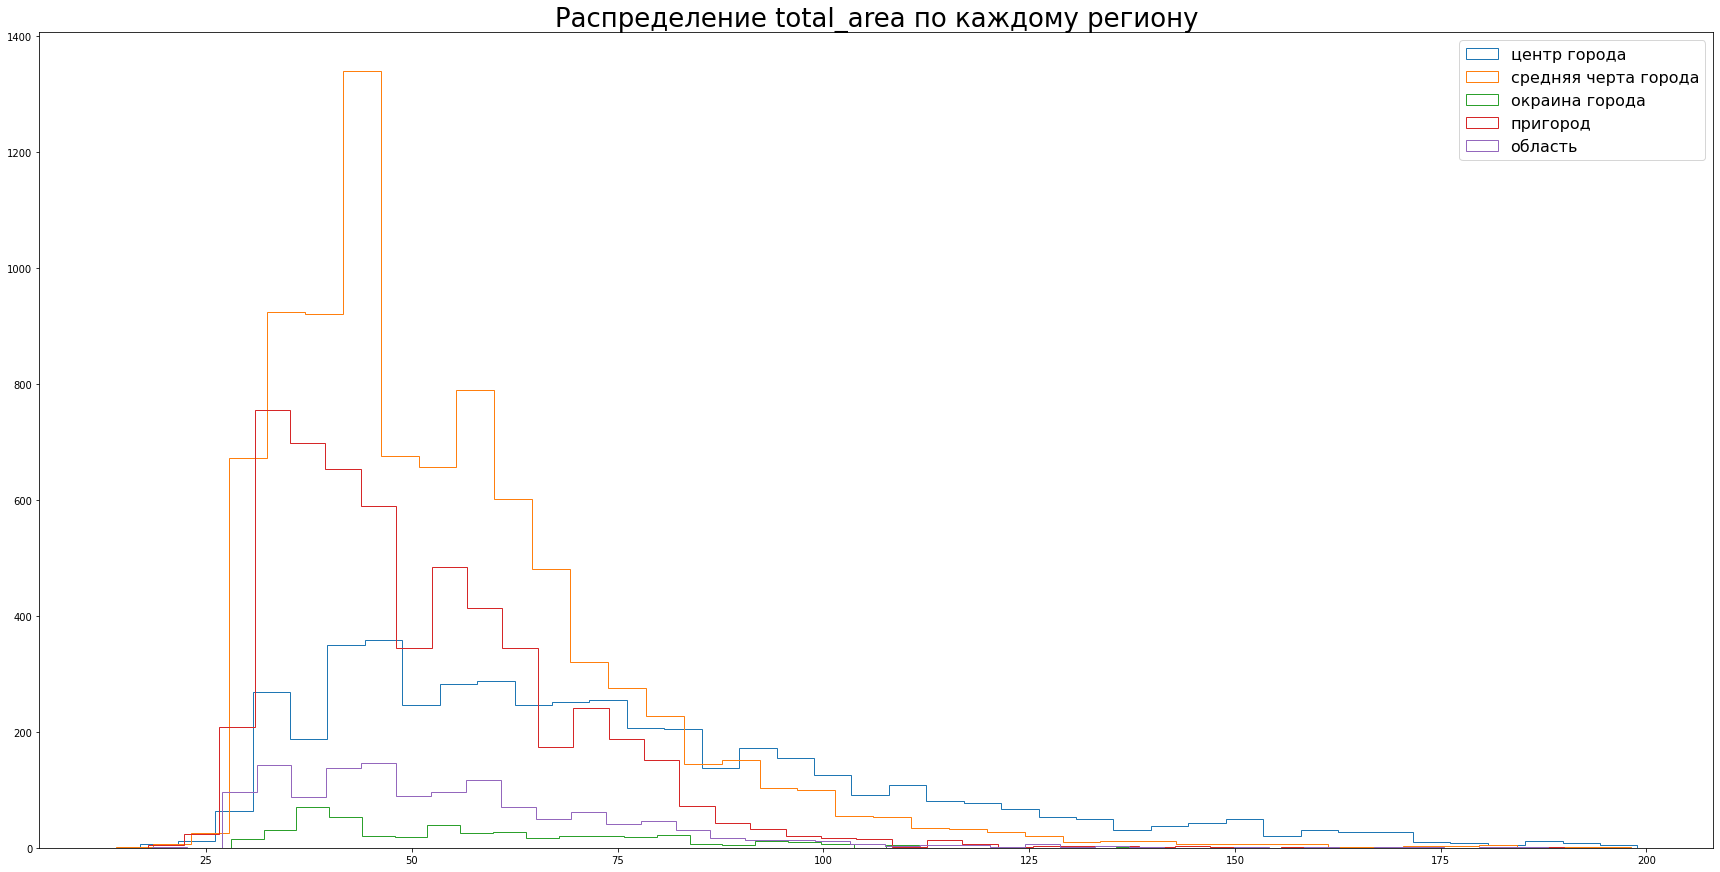

In [83]:
# общая площадь
hist_by_part_of_the_region('total_area')

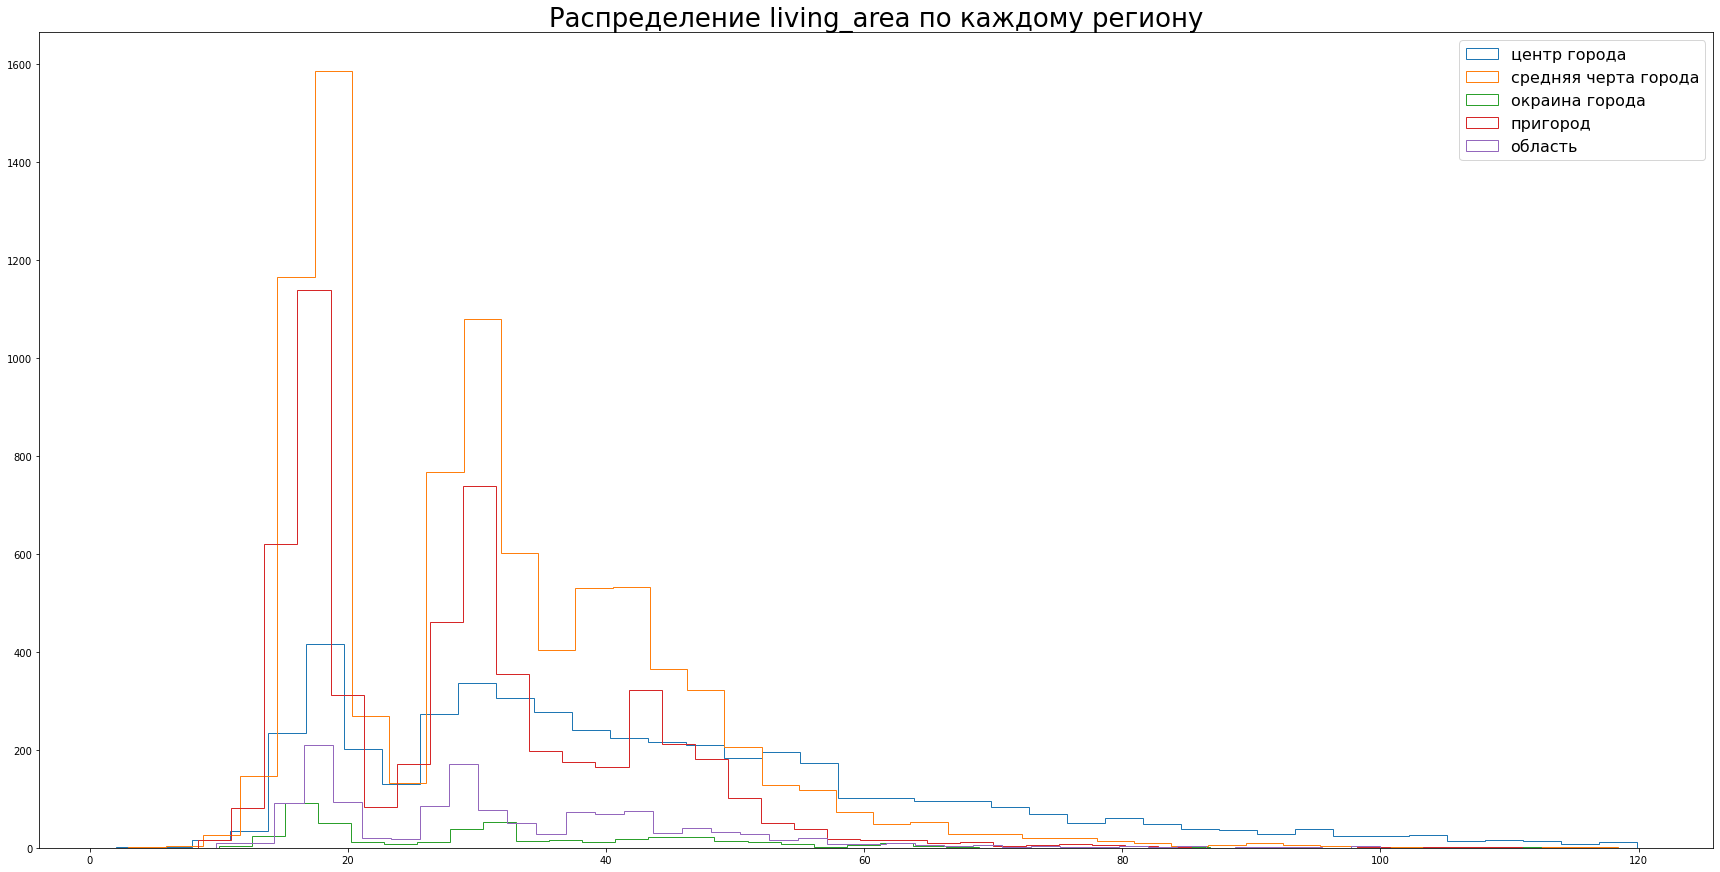

In [84]:
# жилая площадь
hist_by_part_of_the_region('living_area')

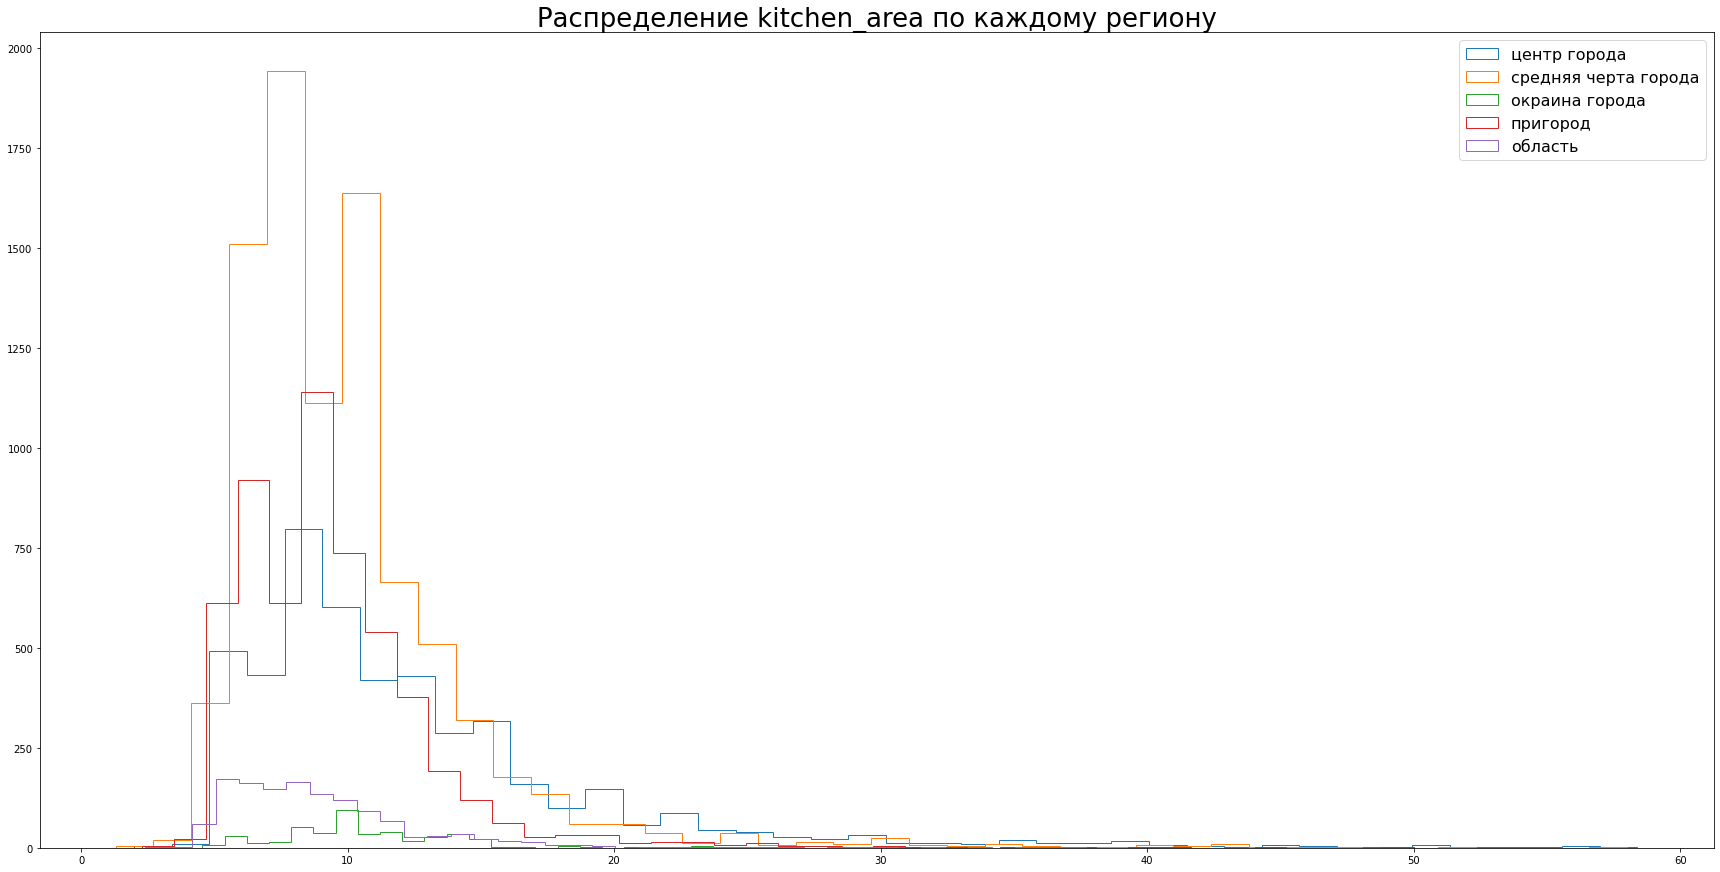

In [85]:
# площадь кухни
hist_by_part_of_the_region('kitchen_area')

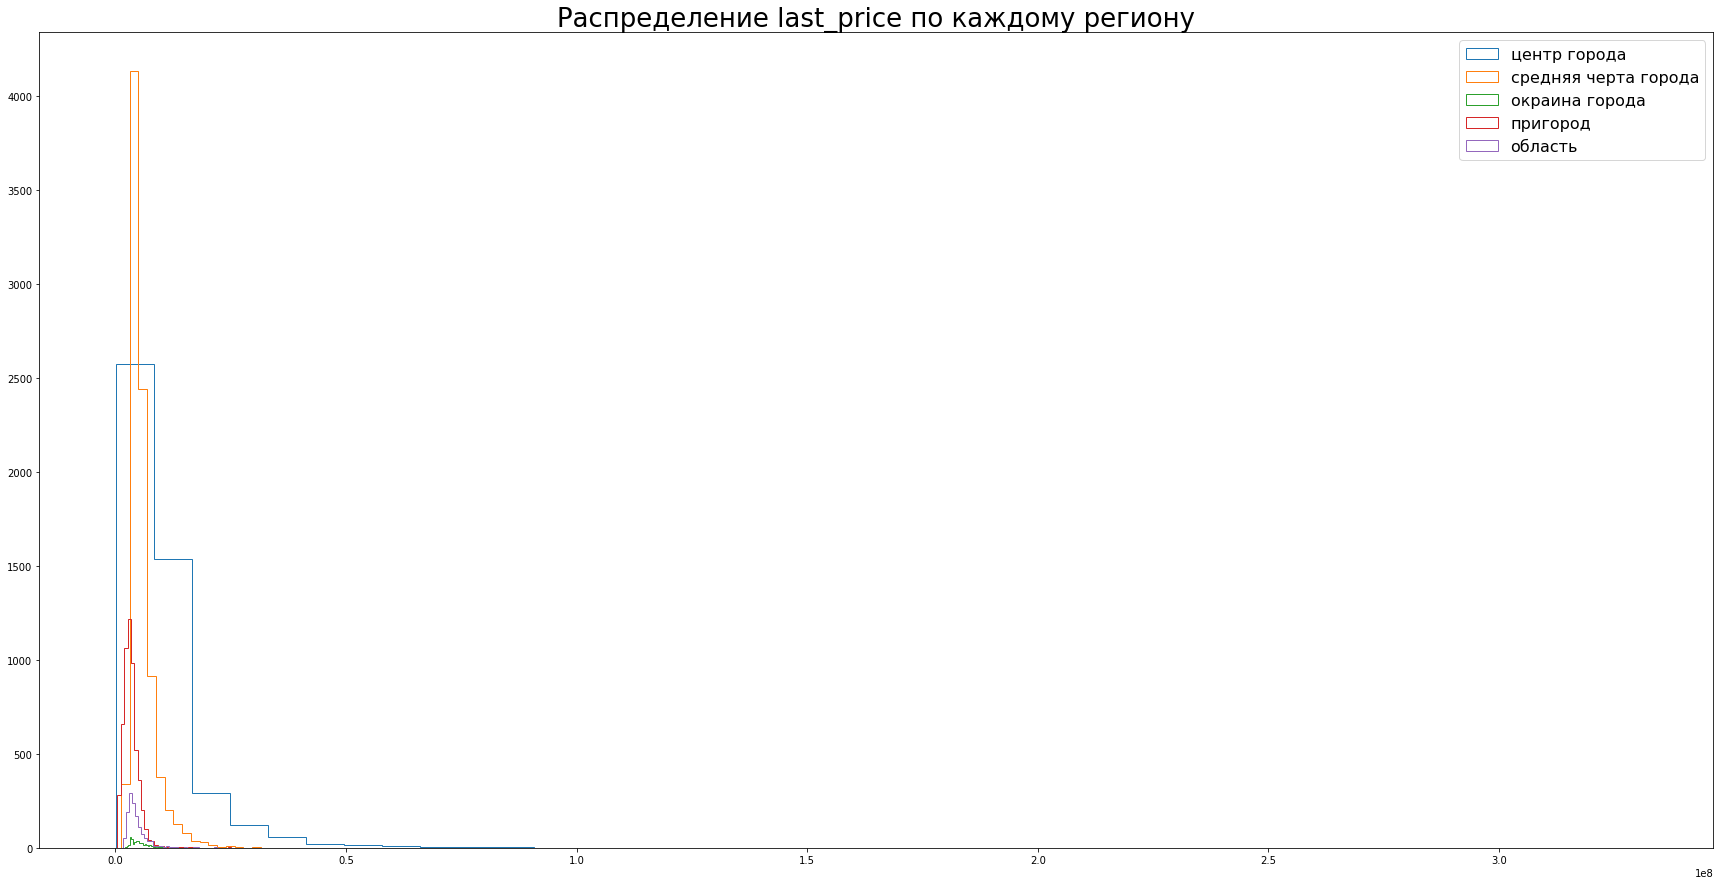

In [86]:
# цена объекта
hist_by_part_of_the_region('last_price')

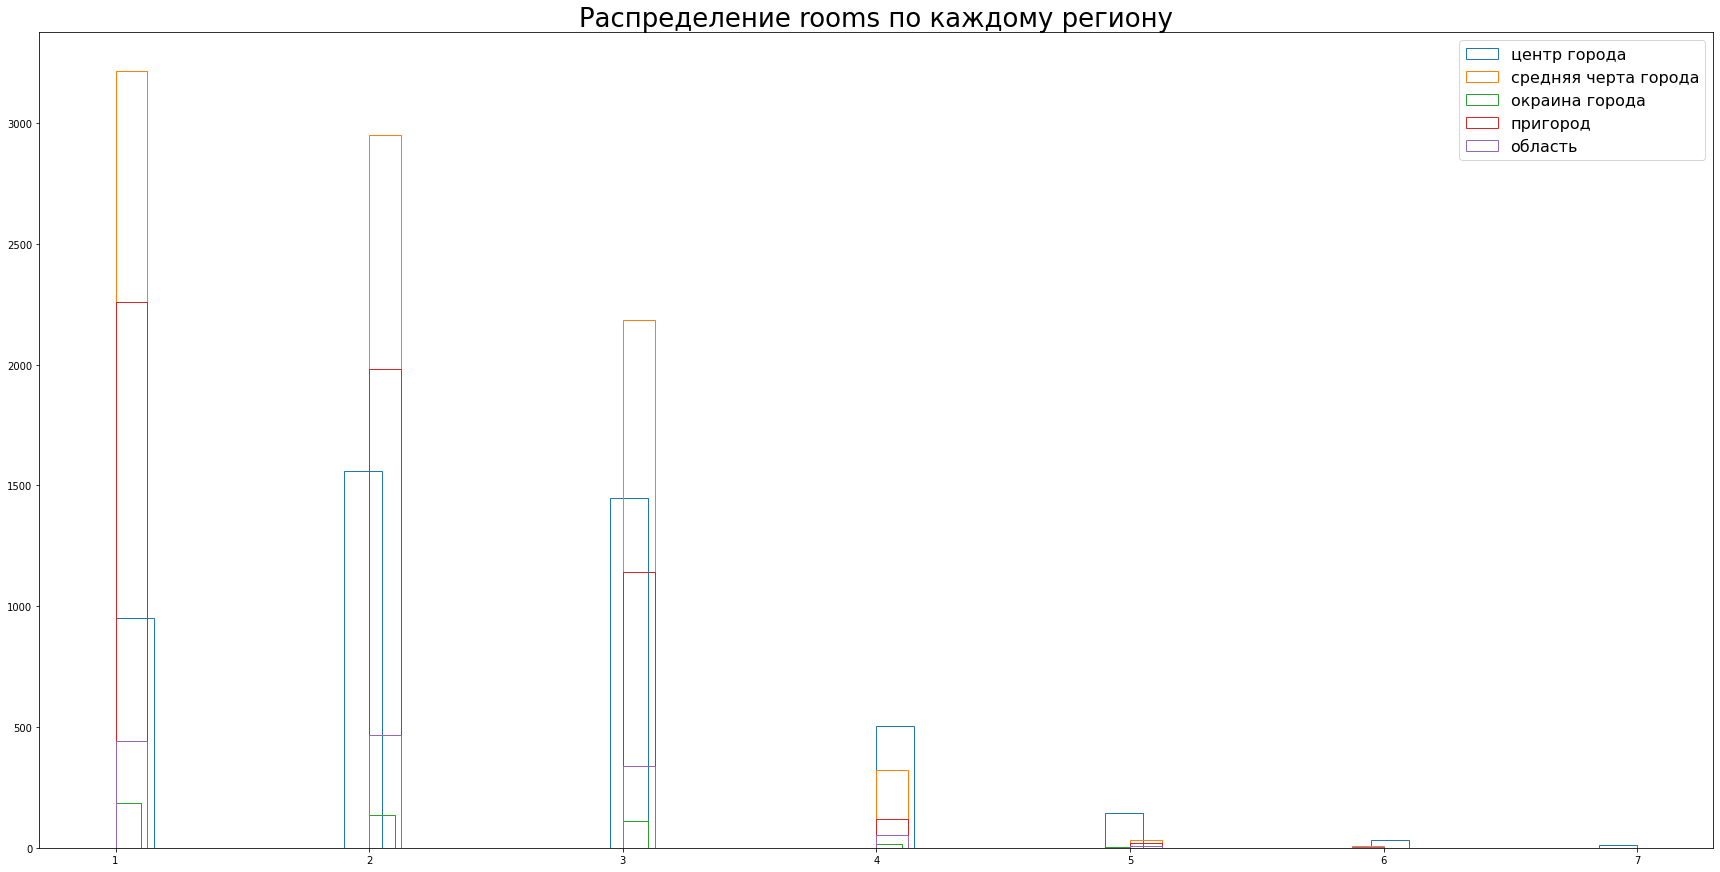

In [87]:
# количество комнат
hist_by_part_of_the_region('rooms')

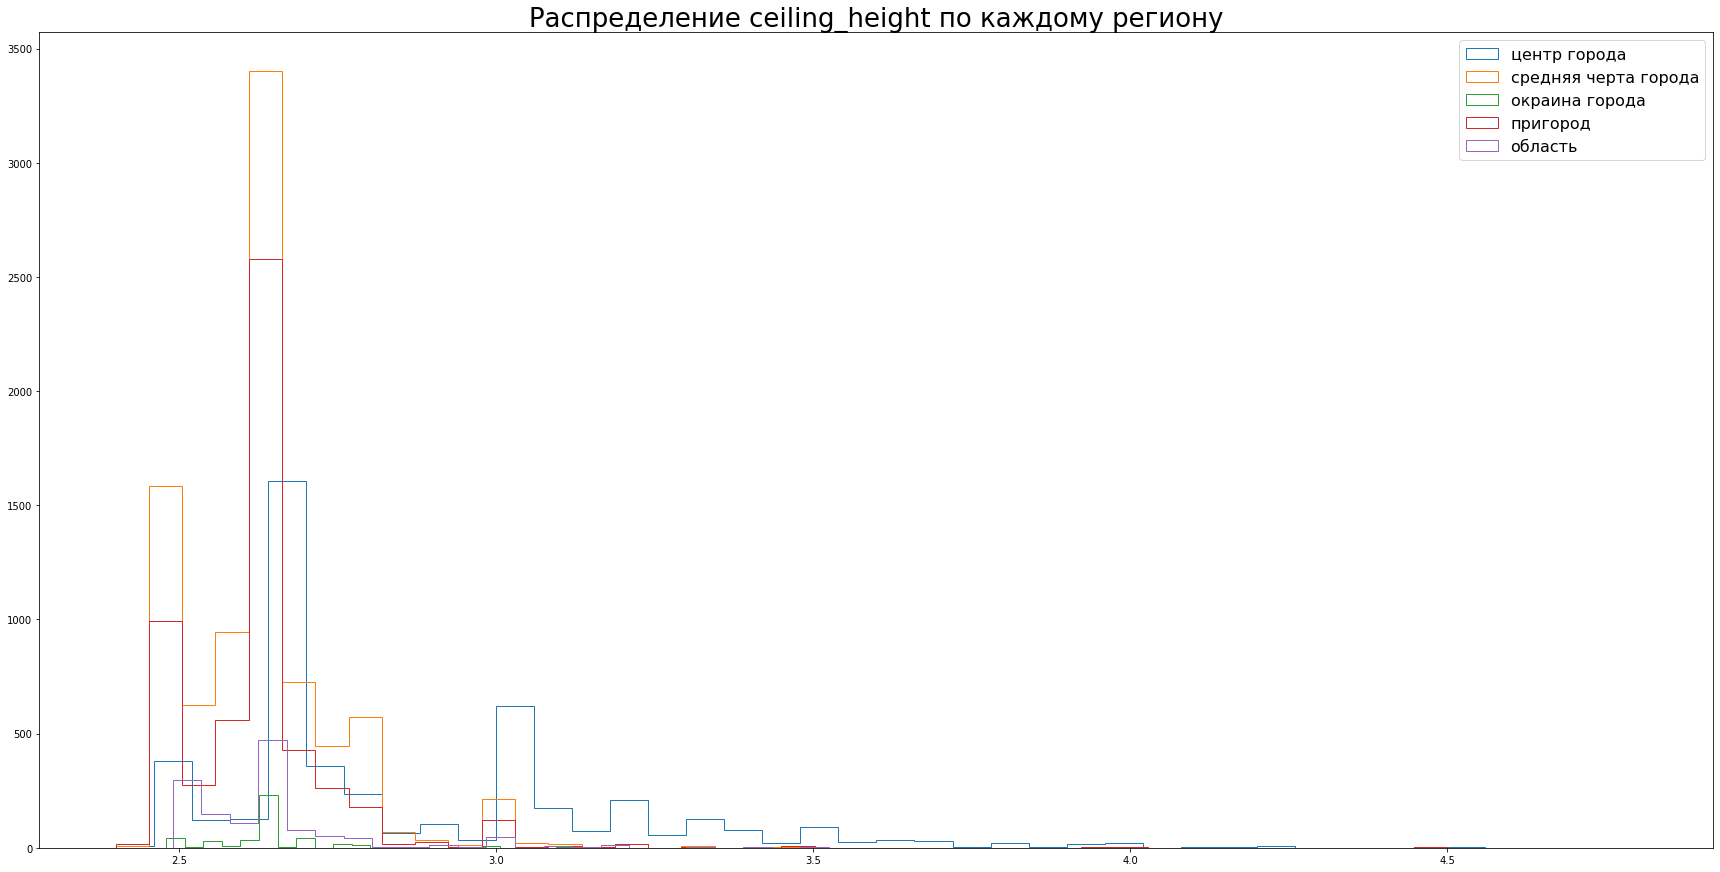

In [88]:
# высота потолков
hist_by_part_of_the_region('ceiling_height')

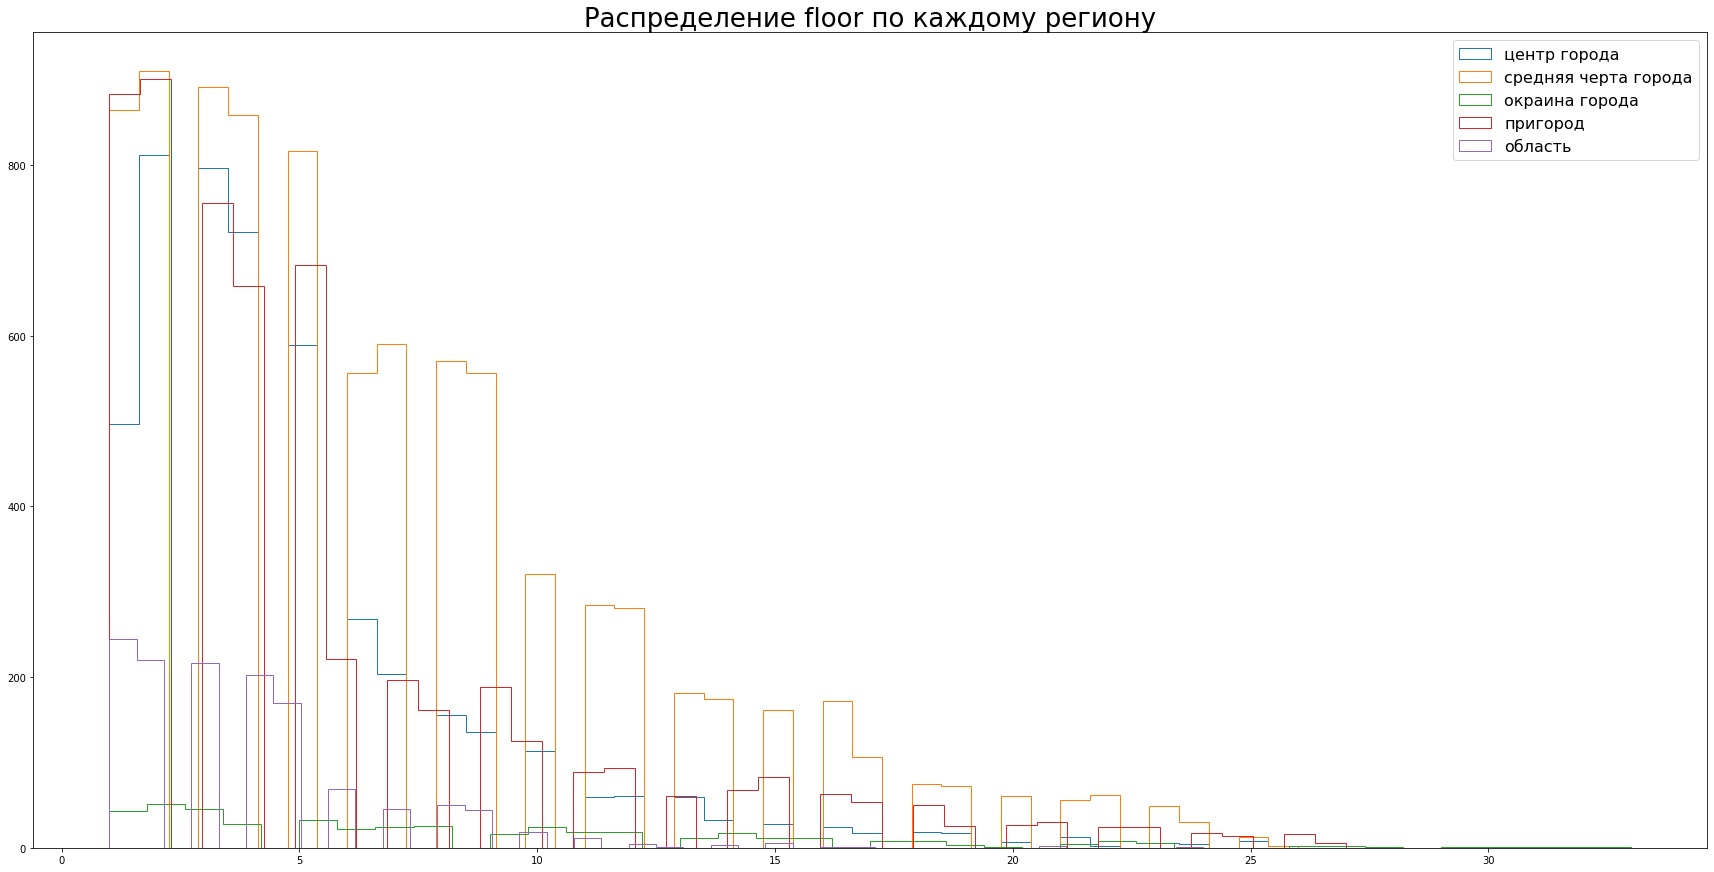

In [89]:
# этаж квартиры
hist_by_part_of_the_region('floor')

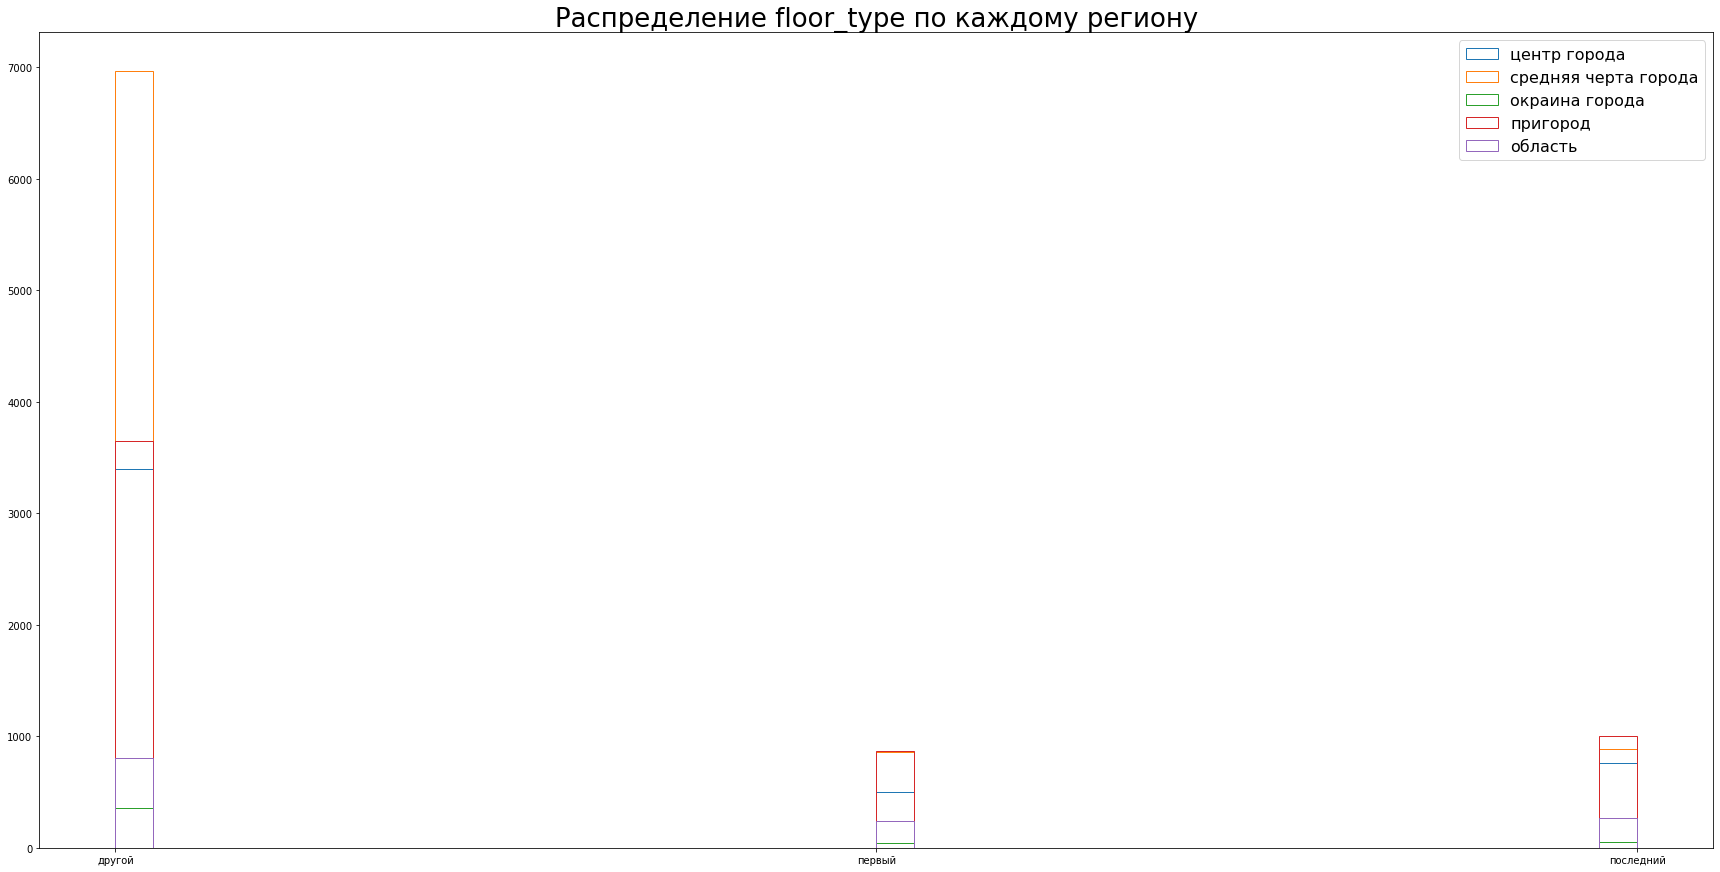

In [90]:
# тип этажа квартиры
hist_by_part_of_the_region('floor_type')

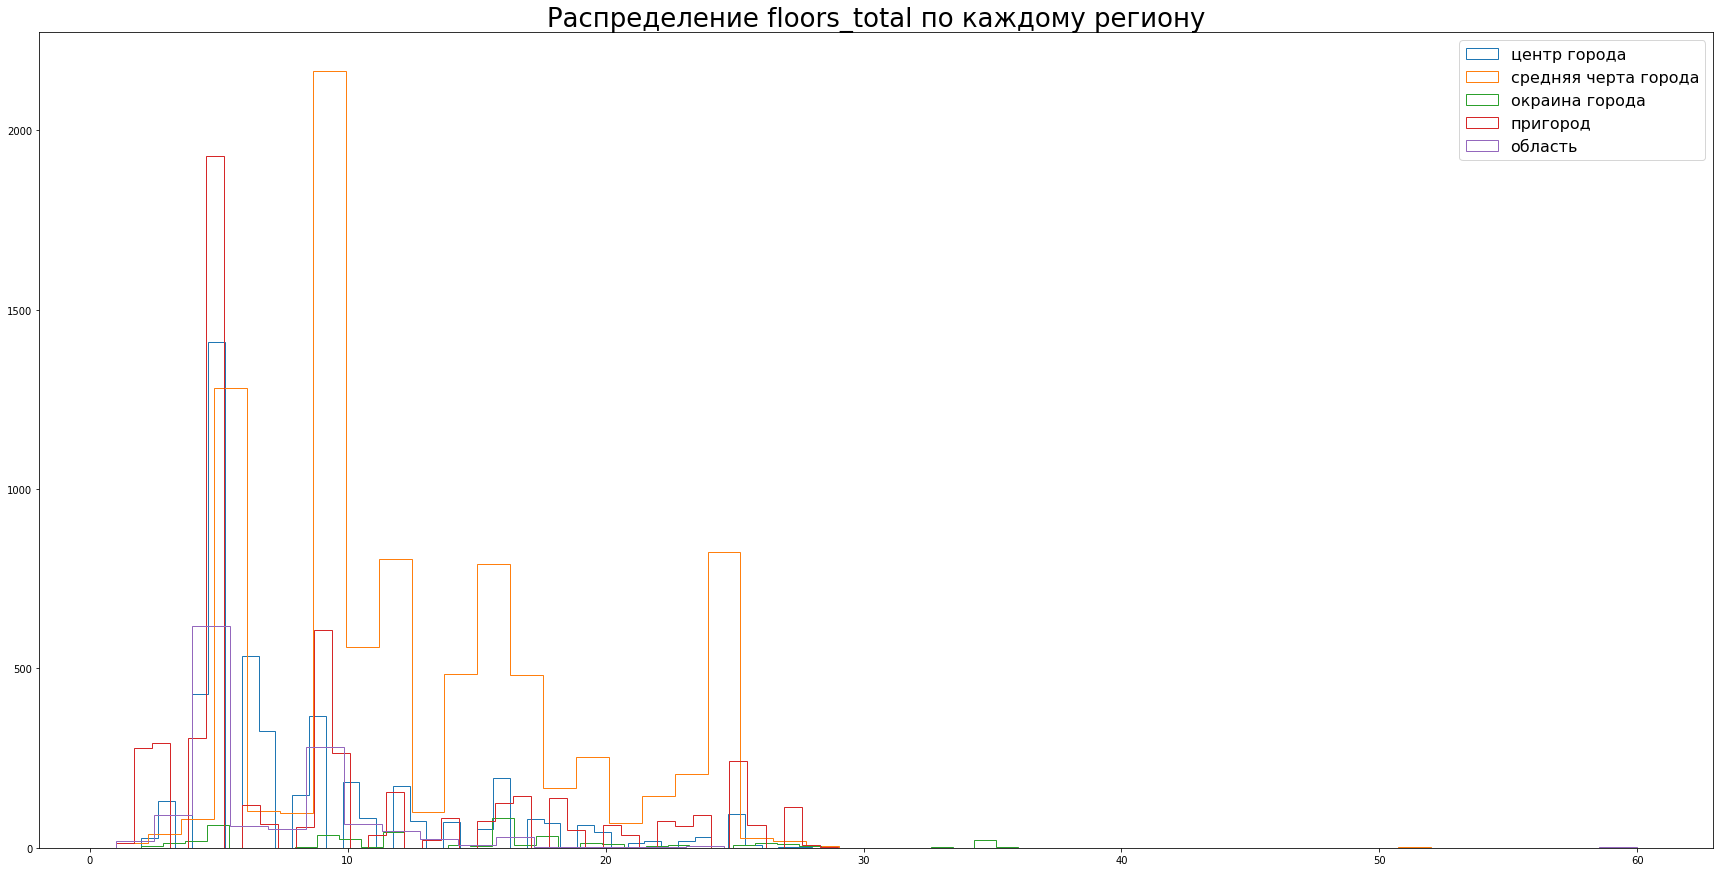

In [91]:
# общее количество этажей в доме
hist_by_part_of_the_region('floors_total')

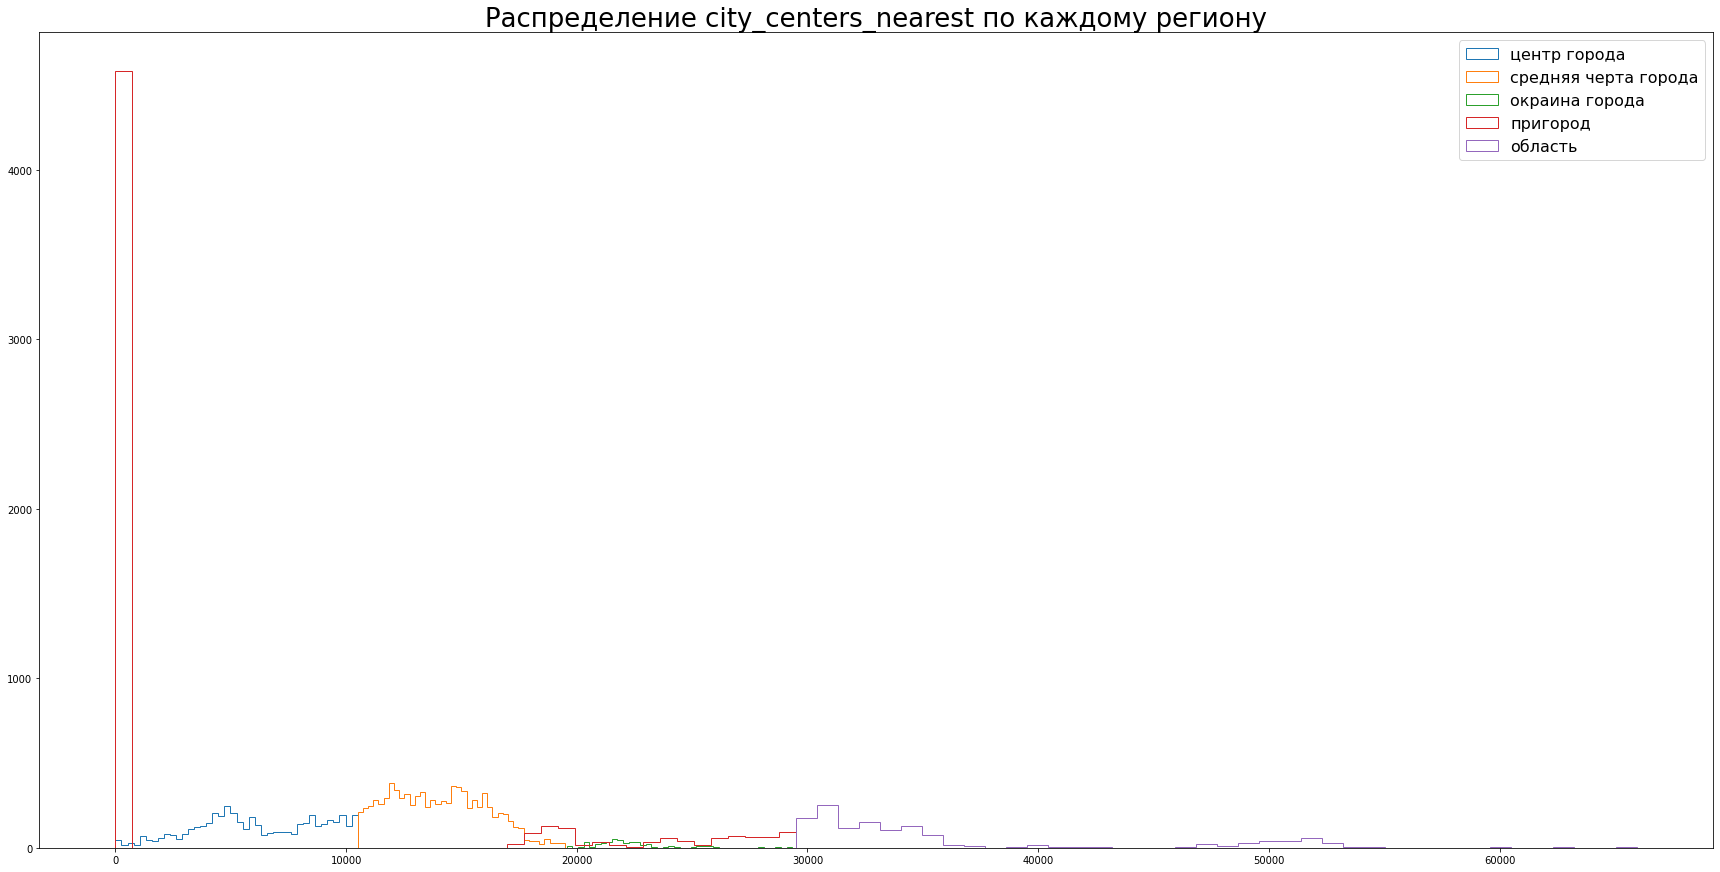

In [92]:
# расстояние до центра города в метрах
hist_by_part_of_the_region('city_centers_nearest')

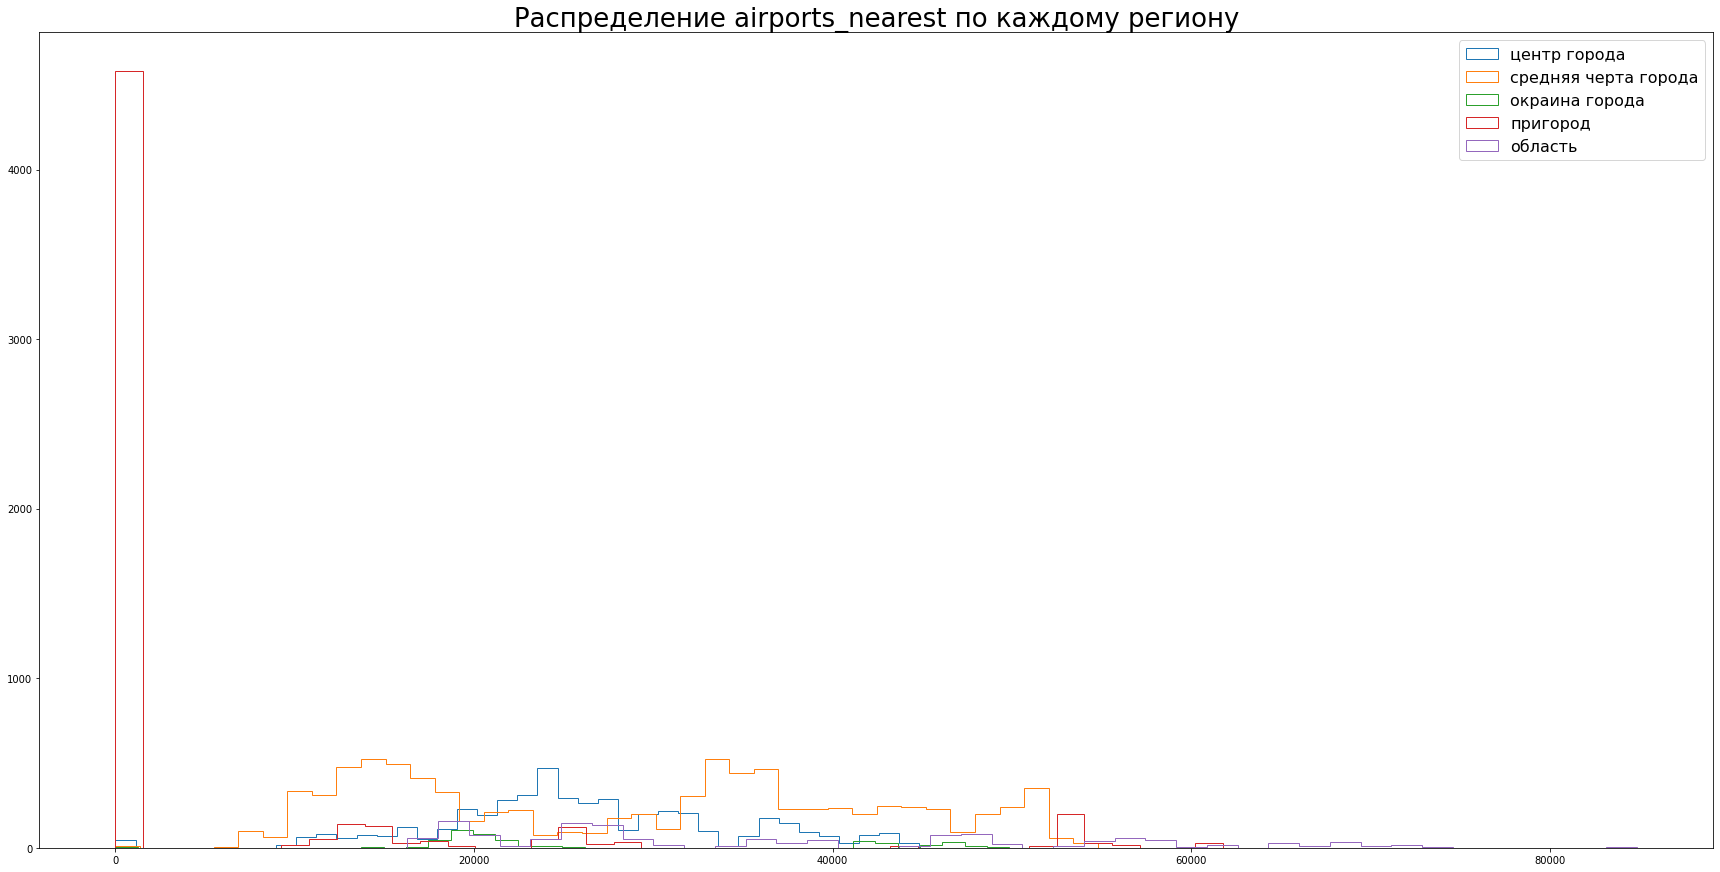

In [93]:
# расстояние до ближайшего аэропорта
hist_by_part_of_the_region('airports_nearest')

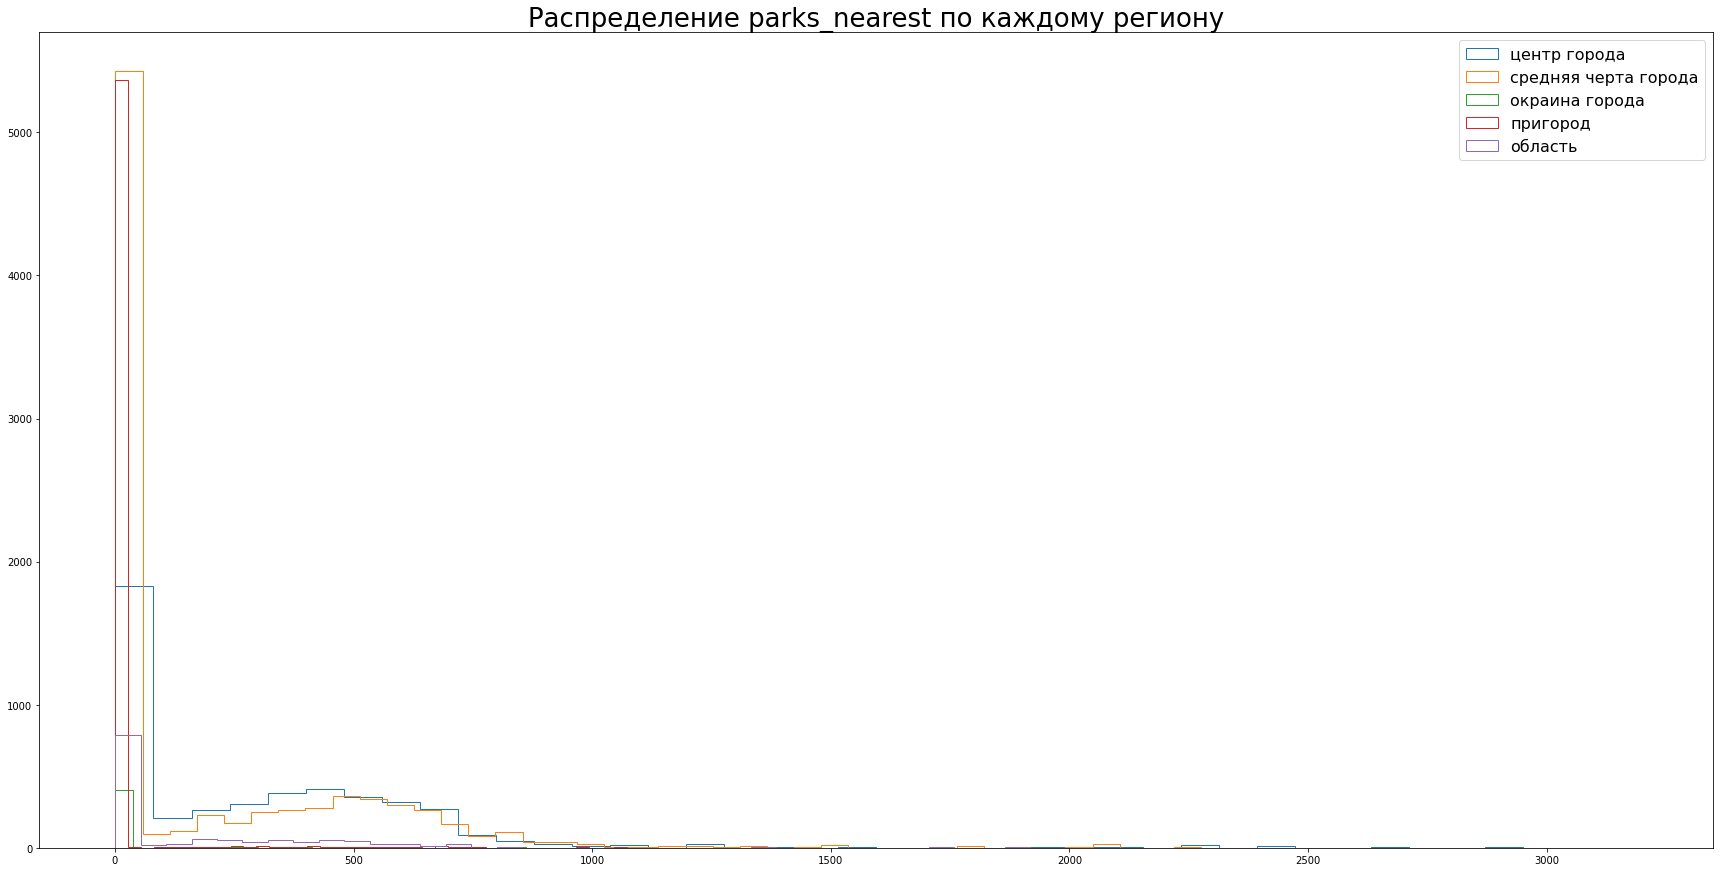

In [94]:
# расстояние до ближайшего парка
hist_by_part_of_the_region('parks_nearest')

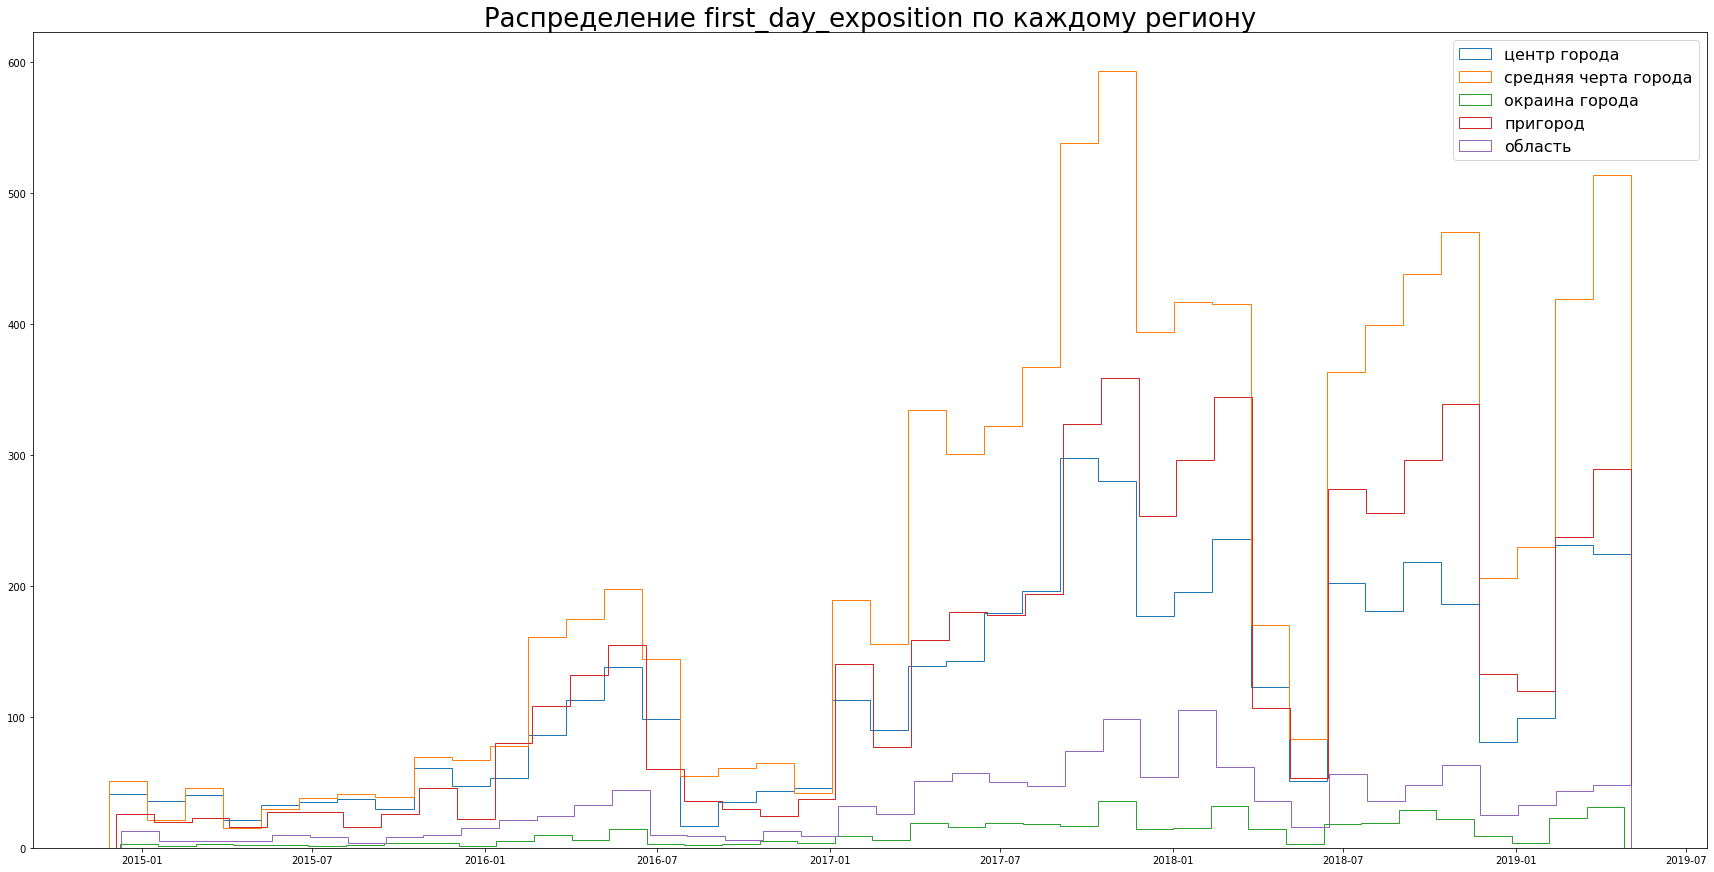

In [95]:
# день и месяц публикации объявления
hist_by_part_of_the_region('first_day_exposition')

Вывод по гистограммам:

**Общая площадь**  
От 30 до 60 м² - средний показатель по всем регионам. Но на гистограмме видно, что в центре города больше всего предложений с большой квадратурой, от 100 и более м². Второй регион по "большим" предложениям - средняя черта города. Третий, уже едва различимый - пригород. А на окраине города и в области таких предложений уже минимально. Если смотреть с другого конца, самое минимальное по квадратам предложение находится в центре города, потом в средней черте и в пригороде. Минимальные предложения по области и окраине города уже начинаются примерно с 30 м². Если хочется больше вариантов с большой квадратурой, стоит присмотреться к центру города - тут самый широкий ассортимент, от скромных предложений, лишь бы в центре, до просторных 200 м² (скорее всего, это элитное жильё). По средничкам уже больше вариантов в средней черте города и в пригороде, средние предложения в средних чертах региона. Область и окраина города как внешние границы города и всего региона тоже преимущественно в средних показателях, но предложений уже значительно меньше. Коммуникации на окраине города уже не такие доступные, как в средней черте, а в пригороде уже больше пространства, поэтому на окраине города не очень много предложений. С областью примерно такая же ситуация, чем ближе к крупному городу, тем больше возможностей есть у жителей, поэтому при выборе между облатью и пригородом, пригород выгоднее.

**Жилая площадь**  
По всем регионам чётко видны два пика - ~15 и ~30 м². Само распределние по графику с жилой площадью относительно сопоставимо с распределнием по графику общей площади, лидеры по самым большим предложениям сохраняются. Значит, для средних 30-60 м² общей площадки, планировки с 15 и 30 м² самые популярные.

**Площадь кухни**  
Опять у всех регионов экстремум примерно на одном показателе - 9 м². С распределением аналогично, как и с жилой площадью. Сколько бы жилых метров ни было, а кухни чаще всего не большие.

**Цена объекта**  
Довольно ожидаемо, но топ самых дорогих квартир: центр города, средняя черта города и пригород. Окраина города и область делят последнее место в этом топе, они самые дешёвые и во многом в той же категории, что и пригород с небольшим отрывом, т.к. в пригороде больше вариантов предложений.

**Количество комнат**  
Стандартные 1-3 комнатные предложения самые популярный в средней черте города, затем в пригороде (кроме 3-комнатных, там второе место уже в центра с небольшим отрывом). Напоминает общую картину с метражом, значит, кореляция точно есть, это хорошо.
Большие предложения с 4-7 комнатами уже лидируют в центре города. Это вполне сопоставимо и по результатам обзора квадратуры, и стоимости.

**Высота потолков**  
Центр города и пригород - обладатели предложений с самыми высокими потолками. В черте города есть закономерность - чем дальше от центра, тем ниже потолки.

**Этаж квартиры**  
Общая тенденция такова, что чем выше этаж, тем меньше на него во всех регионах предложений.

**Тип этажа квартиры («первый», «последний», «другой»)**  
Теория вероятности ликует, минимальный и максимальный вариант встречаются реже чем все прочие и не важно, какой регион рассматриваем.

**Общее количество этажей в доме**  
Довольно неравномерное распределение по всем регионам, значит, застройщики не стремились нигде создать город под копирку, что в центре, что в области.

**Расстояние до центра города в метрах**  
Всё так, как мы и распределили по регионам. Крупный пик в пригороде на 0 км от центра, это из-за того, что ранее мы заполнили 0 пропущенные значения.

**Расстояние до ближайшего аэропорта**  
Крупный пик в пригороде на 0 км от центра, это из-за того, что ранее мы заполнили 0 пропущенные значения. В остальном, неоднородная картина, но точно можено сказать, что недвижимость в области может быть максимально удалена от аэропорта. С другой стороны, жителям пригорода может быть ближе всего до него.

**Расстояние до ближайшего парка**  
Чуть меньше полукилометра идти большинству до парка, +- 500 метров, остальные ситуации уже не очень типичны. Крупный пик в пригороде на 0 км от центра, это из-за того, что ранее мы заполнили 0 пропущенные значения.

**День и месяц публикации объявления**  
Самый пик выставленных предложений пришёлся на конец 2017 года, дальше был незначительный спад. Возможно, причиной более активной продажи квартир стало улучшение ситуации на Российском рынке из-за повышения цен на нефть. Центробанк снизил ключевую ставку, что позволило гражданам активнее брать ипотеки и улучшать жилищные условия, а чтобы было чем заплатить первоначальный взнос или быстрее закрыть ипотеку - предыдущее жильё продают. С другой стороны, т.к. не указано, предложения по новостройкам или вторичкам, может, больше предложений поступило как раз от застройщиков, т.к. им выгодно предлагать товар тогда, когда спрос на него будет больше.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Выводы верные! Отличная работа
</div>

Изучим, как быстро продавались квартиры (days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление

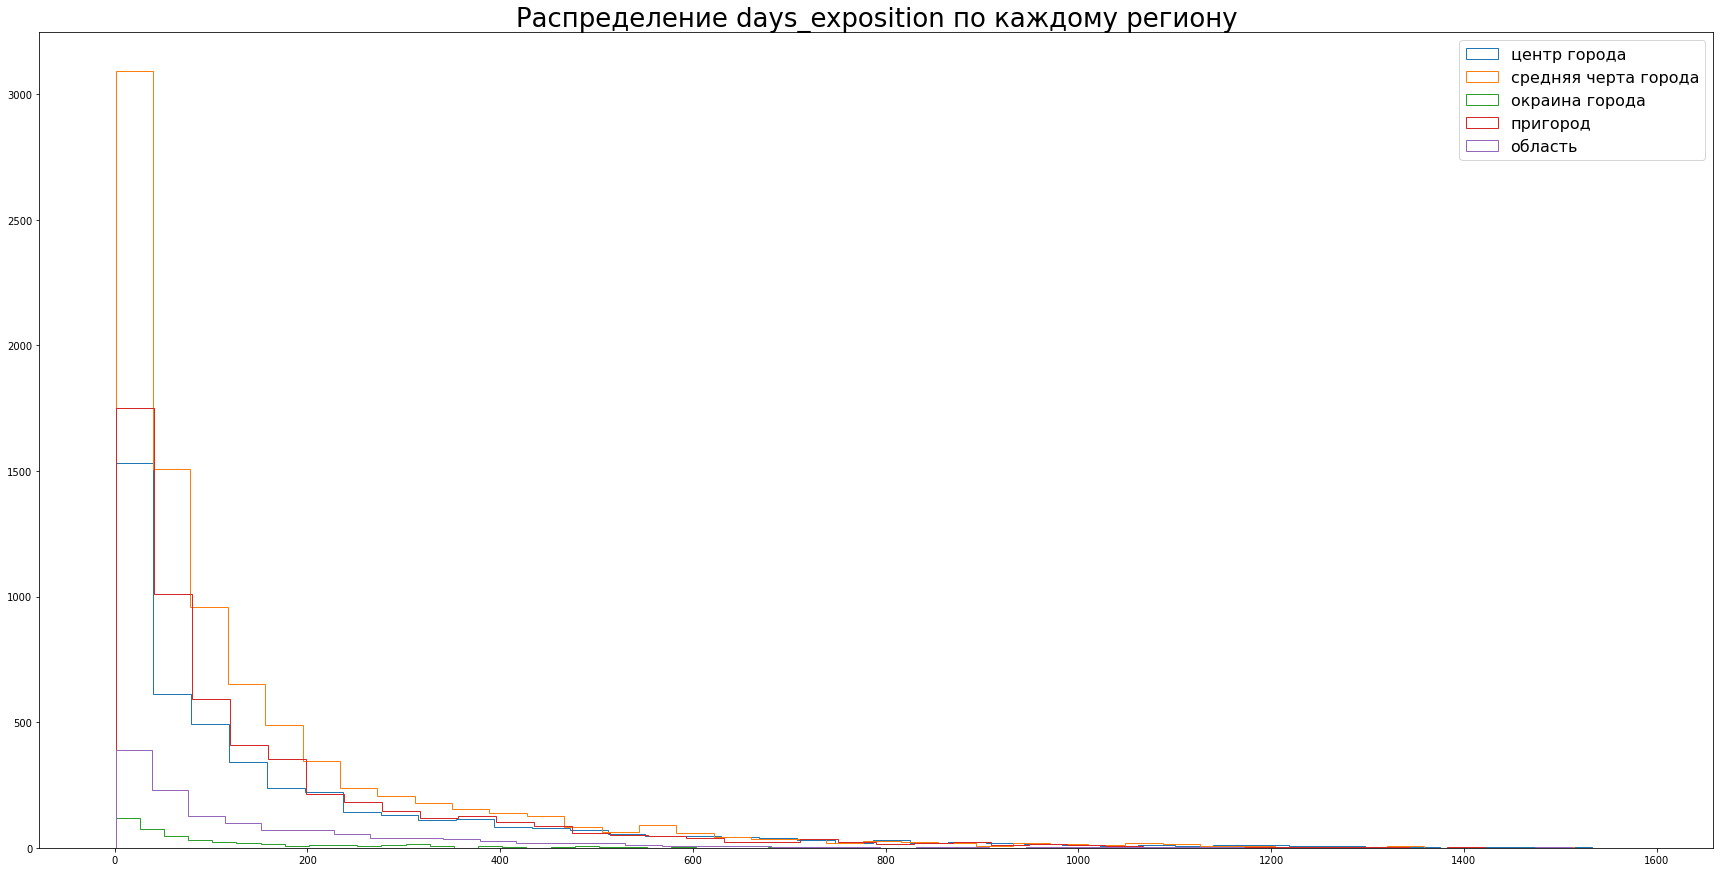

In [96]:
# динамика скорости продажи
hist_by_part_of_the_region('days_exposition')

In [97]:
parts_of_the_region = ['центр города', 'средняя черта города', 'окраина города', 'пригород', 'область']
print('Количество дней от публикации до продажи')
for part in parts_of_the_region:
        subset = good_data[good_data['part_of_the_region'] == part]['days_exposition']
        print(f"\nДля региона '{part}': \nмедиана = {subset.median()}, среднее = {subset.mean()}")

Количество дней от публикации до продажи

Для региона 'центр города': 
медиана = 90.0, среднее = 189.3830610490112

Для региона 'средняя черта города': 
медиана = 70.0, среднее = 144.78058296993345

Для региона 'окраина города': 
медиана = 63.0, среднее = 139.91741071428572

Для региона 'пригород': 
медиана = 79.0, среднее = 156.38557709730023

Для региона 'область': 
медиана = 88.0, среднее = 167.25381097560975


Красивая картина, медиана сроков продажи одинакова для всех регионов и составляет 95 дней. А в среднем дольше всего продаются квартиры в центре города (может, из-за стоимости) и в области (тут скорее из-за удалённости от коммуникаций). Быстрее всего предложения расхватывают на окраине и в средней черте города, пригород остаётся посередине. Но даже так, максимальная разница по средним дня с публикации до продажи 54 дня, это около двух месяцев, выглядит, как не очень большая разница. Продажи, совершённые до истечения 95 дней можно считать быстрыми.  
От 95 и до 200 дней блок средних по скорости продаж. От 201 до 800 - длительные продажи, более 801 - уже необычно долгие.



<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

Оценим, какие факторы больше всего влияют на общую (полную) стоимость объекта:

In [98]:
#plt.figure(figsize=(3,10))
#sns.heatmap(good_data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Blues", annot=True, annot_kws={'size':10})

~~Корреляция между 'total_area', 'living_area', 'kitchen_area' положительная сильная и  самая ярко выраженная. Кореляция между кол-вом комнат и общей и дилой площадью тоже отлично видна, самая малая между количеством комнат и площадью кухни, всего 0,7. Итого, ожидаемая положительная кореляция между всеми этими параметрами подтвердилась.~~

*Исправление после ревью v1*

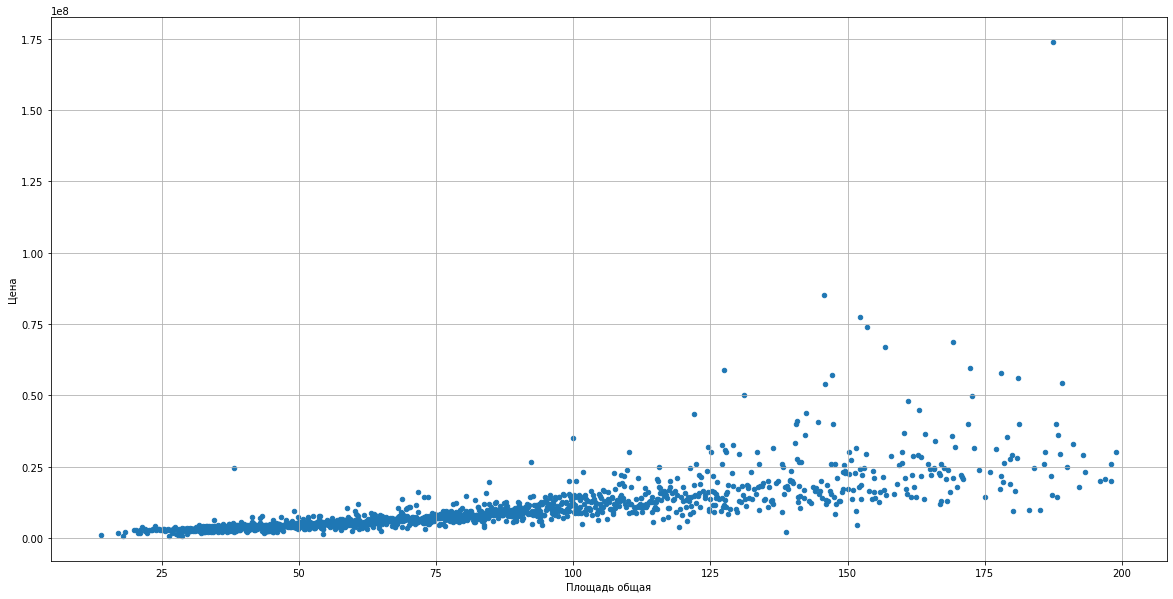

0.65

In [99]:
# общая площадь
last_price_total = good_data.pivot_table(index='total_area', values='last_price', aggfunc= 'median')
last_price_total = last_price_total.reset_index()
last_price_total.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(20, 10))
plt.xlabel('Площадь общая')
plt.ylabel('Цена')
plt.show()

good_data['last_price'].corr(good_data['total_area']).round(2)

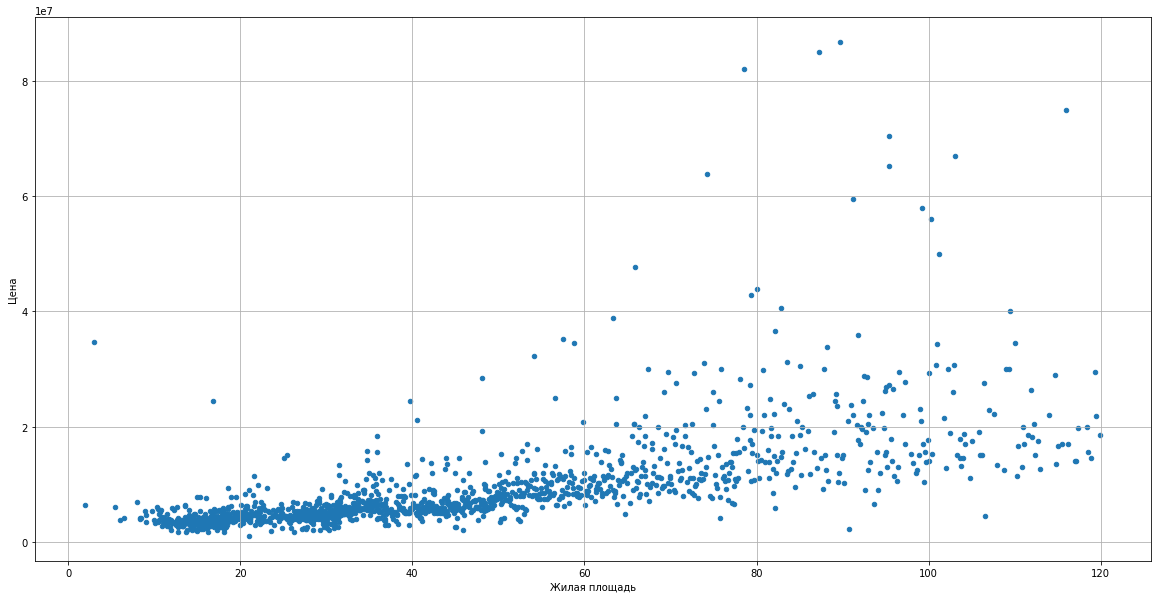

0.54

In [100]:
# жилая площадь
last_price_total = good_data.pivot_table(index='living_area', values='last_price', aggfunc= 'median')
last_price_total = last_price_total.reset_index()
last_price_total.plot(x='living_area', y='last_price', kind='scatter', grid=True, figsize=(20, 10))
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

good_data['last_price'].corr(good_data['living_area']).round(2)

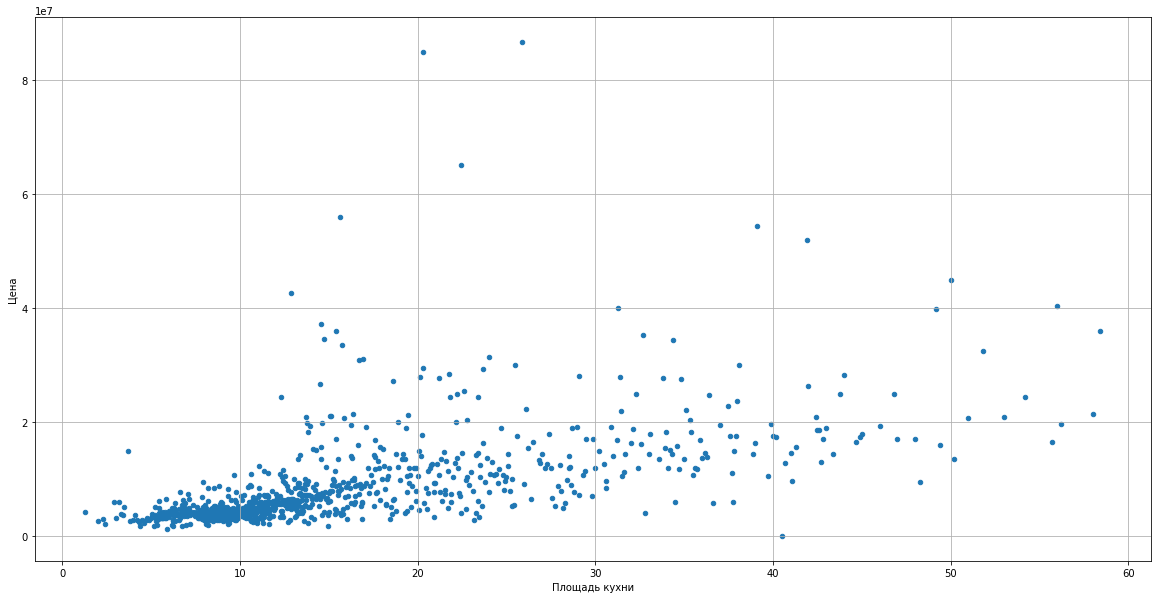

0.49

In [101]:
# площадь кухни
last_price_total = good_data.pivot_table(index='kitchen_area', values='last_price', aggfunc= 'median')
last_price_total = last_price_total.reset_index()
last_price_total.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, figsize=(20, 10))
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()

good_data['last_price'].corr(good_data['kitchen_area']).round(2)

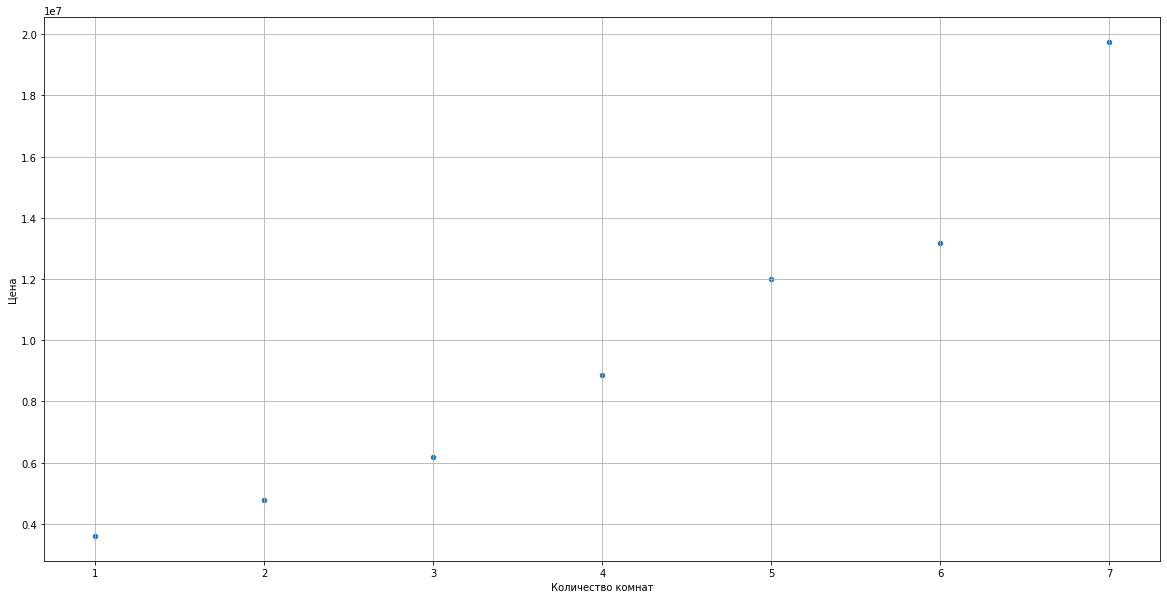

0.37

In [102]:
# количество комнат
last_price_total = good_data.pivot_table(index='rooms', values='last_price', aggfunc= 'median')
last_price_total = last_price_total.reset_index()
last_price_total.plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(20, 10))
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

good_data['last_price'].corr(good_data['rooms']).round(2)

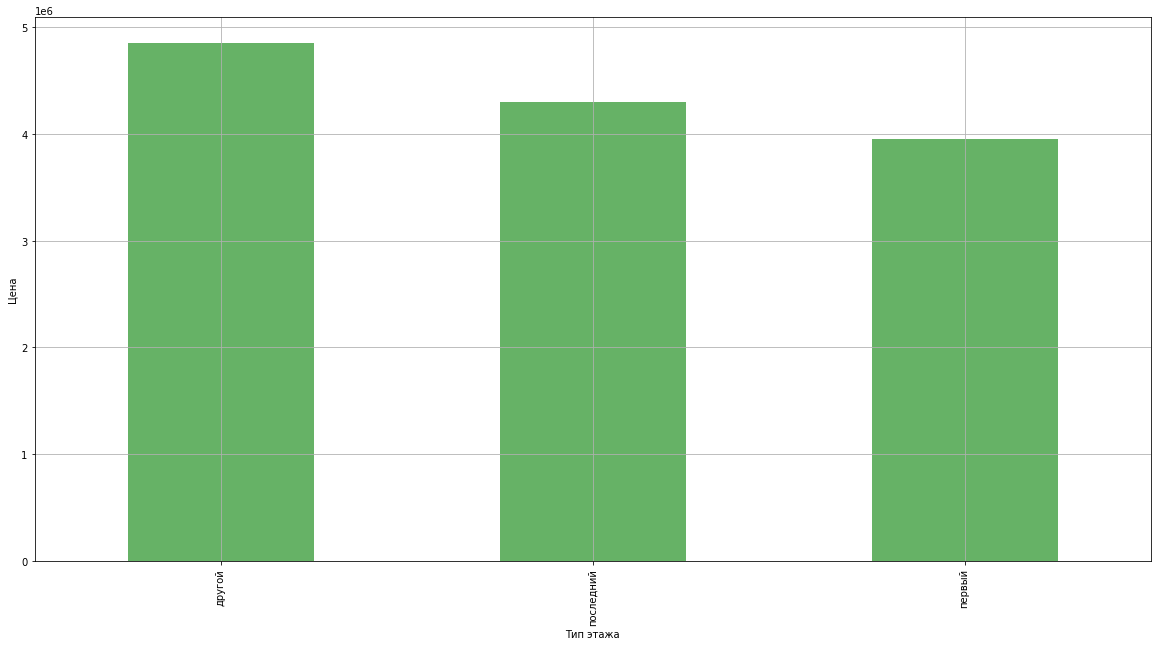

In [103]:
# тип этажа
(
    good_data
    .pivot_table(index = 'floor_type', values = 'last_price', aggfunc= 'median')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='bar', figsize=(20, 10), legend=False, grid=True, color='green', alpha=0.6)
)
plt.ylabel('Цена')
plt.xlabel('Тип этажа')
plt.show()

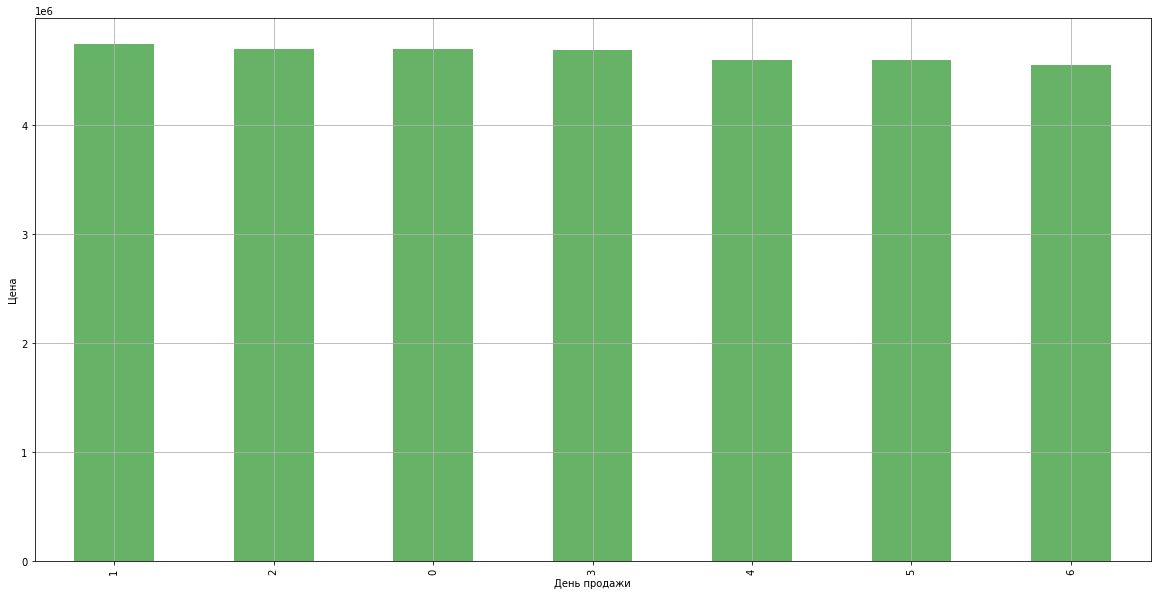

In [104]:
# день продажи
(
    good_data
    .pivot_table(index = 'publication_weekday', values = 'last_price', aggfunc= 'median')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='bar', figsize=(20, 10), legend=False, grid=True, color='green', alpha=0.6)
)
plt.ylabel('Цена')
plt.xlabel('День продажи')
plt.show()

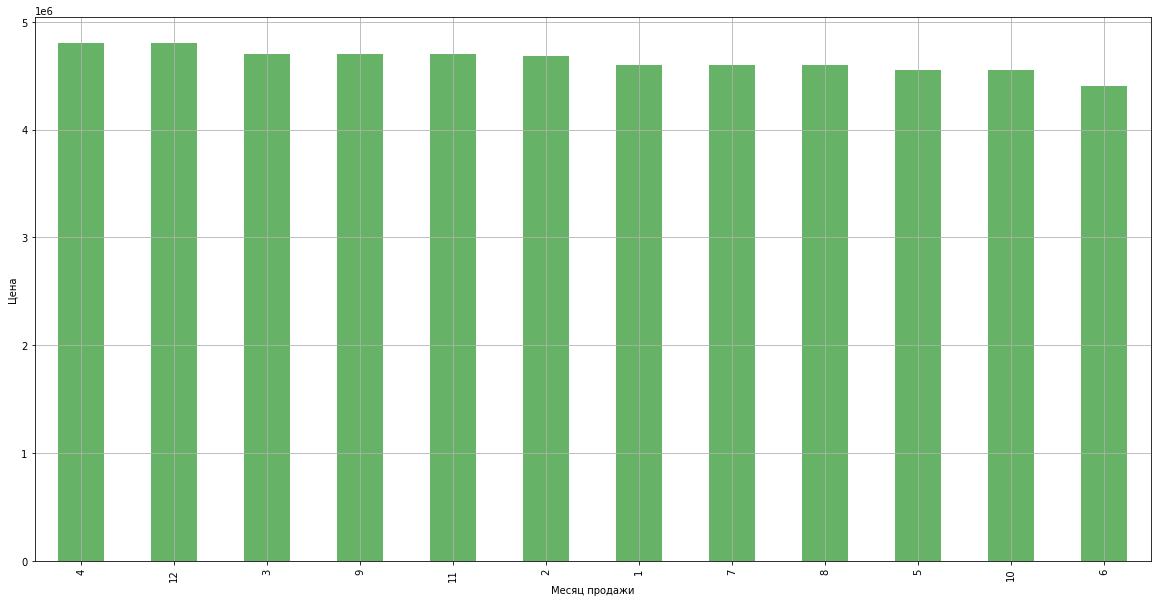

In [105]:
# месяц продажи
(
    good_data
    .pivot_table(index = 'publication_month', values = 'last_price', aggfunc= 'median')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='bar', figsize=(20, 10), legend=False, grid=True, color='green', alpha=0.6)
)
plt.ylabel('Цена')
plt.xlabel('Месяц продажи')
plt.show()

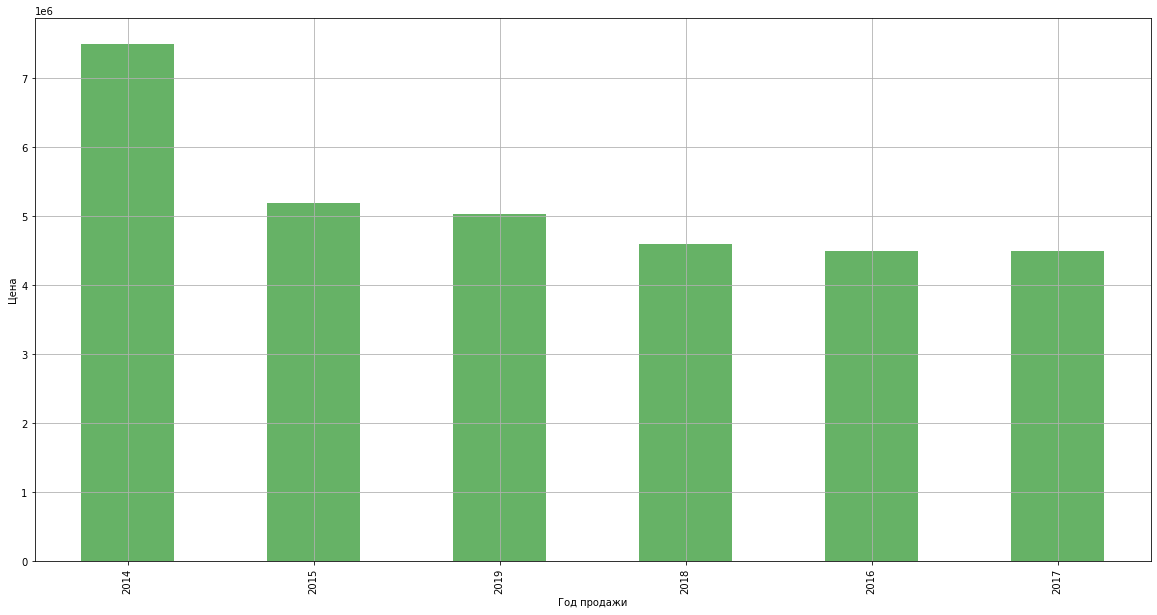

125

In [106]:
# год продажи
(
    good_data
    .pivot_table(index = 'publication_year', values = 'last_price', aggfunc= 'median')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='bar', figsize=(20, 10), legend=False, grid=True, color='green', alpha=0.6)
)
plt.ylabel('Цена')
plt.xlabel('Год продажи')
plt.show()

good_data.query('publication_year == 2014')['last_price'].count()

**Общая площадь**  
Корреляция Пирсона = 0,65

**Жилая площадь**  
Корреляция Пирсона = 0,54

**Площадь кухни**  
Корреляция Пирсона = 0,49

**Количество комнат**  
Корреляция Пирсона = 0,37

*У вышеперечисленных параметров высокий индекс корреляции, значит, они напрямую влияют на стоимость недвижимости, что выглядит очевидно*

**Тип этажа**  
Сильной зависимости нет, но первые этажи обычно самые дешёвые, за ними последние, а самые дорогие - этажи между первым и последним.

**День продажи**  
Не наблюдается выраженное влияние дня недели выставления предложения на его стоимость.

**Месяц продажи**  
Не наблюдается выраженное влияние месяца выставления предложения на его стоимость.

**Год продажи**  
Самые дорогие квартиры от 2014 года публикации, их не много, всего 128, это меньше, чем за любой другой год. В таблице "Распределение first_day_exposition по каждому региону" 2014 практически не видно. Значит, это близко к аномалии засчёт маленькой выборки => год публикации не сильно влияет на стоимость недвижимости.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Рассчитывать корреляцию Пирсона для категории этажа, дня, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно. Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану
    
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
    
<br>Тебе нужно удалить расчет корреляции для этих параметров и построить графики
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Поправила, вывод актуализировала
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [107]:
# Найдём эти 10 самых объявляемых городов
top_10 = (
    good_data
    .pivot_table(index='locality_name', values='total_images', aggfunc='count')
    .rename(columns={'total_images': 'count'})
    .sort_values('count', ascending=False)
    .head(10)
)
# Посчитаем для каждого стоимость м²
cost_per_meter_by_city = {}
for city in top_10.index:
    cost_per_meter_by_city[city] = good_data.query("locality_name == @city")['cost_per_meter'].mean().round(2)

# Посмотрим на результат
sorted(cost_per_meter_by_city.items(), key=lambda item: item[1], reverse=True)

[('Санкт-Петербург', 112492.86),
 ('Пушкин', 103069.08),
 ('деревня Кудрово', 92248.48),
 ('поселок Парголово', 90756.0),
 ('поселок Мурино', 85412.82),
 ('Петергоф', 83834.91),
 ('поселок Шушары', 78535.19),
 ('Колпино', 75129.85),
 ('Всеволожск', 69102.52),
 ('Гатчина', 68635.62)]

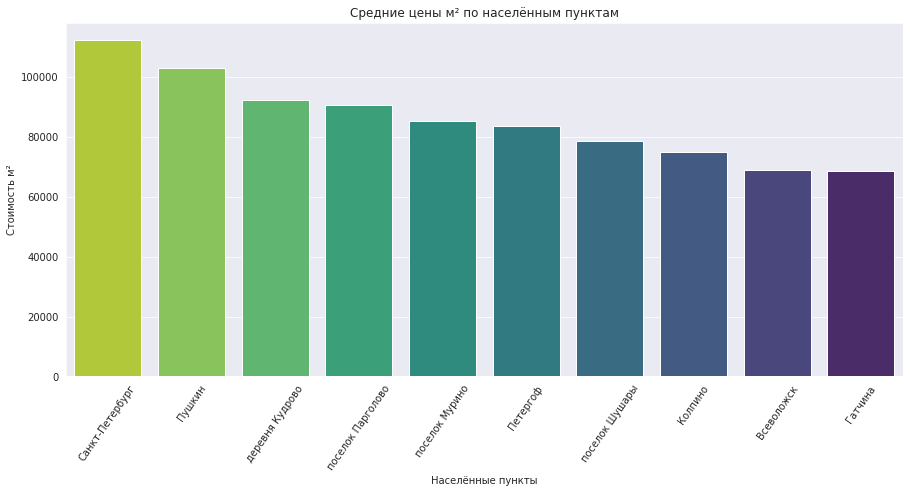

In [108]:
# А теперь нагляднее

df_for_plot = pd.DataFrame(cost_per_meter_by_city.items()).sort_values(by=1, ascending=False)
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
g = sns.barplot(data=df_for_plot, x=0, y=1, ci=False, palette='viridis_r')
g.set_xticklabels(df_for_plot[0], rotation=55, fontdict={'fontsize':10})
g.set(xlabel = 'Населённые пункты', ylabel='Стоимость м²', title='Средние цены м² по населённым пунктам')
plt.show()

На графике хоро видно, что самый дорогой м² в Питере, а самый дешёвый в Выборге

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👏🏻👏🏻👏🏻 Отличная визуализация!
</div>

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра

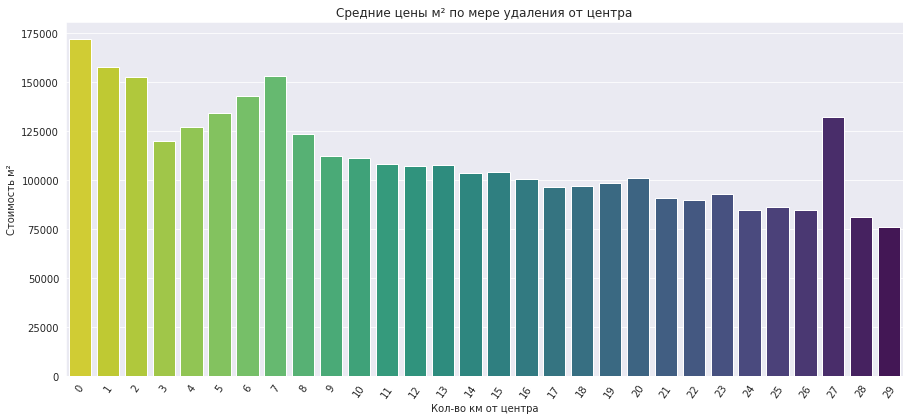

In [109]:
# Выберем записи для Питера
s_peter_data = (
    good_data
    .query("locality_name == 'Санкт-Петербург'")
    .pivot_table(index='distance_to_center', values='cost_per_meter', aggfunc='mean')
    .reset_index()
)
s_peter_data['cost_per_meter'] = s_peter_data['cost_per_meter'].round(2)

plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
g = sns.barplot(data=s_peter_data, x='distance_to_center', y='cost_per_meter', ci=False, palette='viridis_r')
g.set_xticklabels(s_peter_data['distance_to_center'], rotation=55, fontdict={'fontsize':10})
g.set(xlabel = 'Кол-во км от центра', ylabel='Стоимость м²', title='Средние цены м² по мере удаления от центра')
plt.show()


В целом, видна прямая зависимость стоимоси м² и близости к центру, но есть пара явных пиков:  
- 7 км
- 27 км

Значит, на таком удалении в Питере могут быть элитные застройки или крупные предложения, которые влияют на средние значения

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Верно 👍
</div>

### Общий вывод

На основе исследовательского анализа данных:

Разделили предложения по категориям (регионам):
В черте города (locality_name == 'Санкт-Петербург'):
- 0-10 км центр
- 11-19 км средняя черта
- 20 и более км окраина  

За чертой города (locality_name != 'Санкт-Петербург'):
- до 29 км пригород
- 30 и более км область


Разделив данные по этим категориям, оценили предложения по ряду показателей:
- **Общая площадь** - от 30 до 60 м² - средний показатель по всем регионам. Но на гистограмме видно, что в центре города больше всего предложений с большой квадратурой, от 100 и более м². Второй регион по "большим" предложениям - средняя черта города. Третий, уже едва различимый - пригород. А на окраине города и в области таких предложений уже минимально. Если смотреть с другого конца, самое минимальное по квадратам предложение находится в центре города, потом в средней черте и в пригороде. Минимальные предложения по области и окраине города уже начинаются примерно с 30 м². Если хочется больше вариантов с большой квадратурой, стоит присмотреться к центру города - тут самый широкий ассортимент, от скромных предложений, лишь бы в центре, до просторных 200 м² (скорее всего, это элитное жильё). По средничкам уже больше вариантов в средней черте города и в пригороде, средние предложения в средних чертах региона. Область и окраина города как внешние границы города и всего региона тоже преимущественно в средних показателях, но предложений уже значительно меньше. Коммуникации на окраине города уже не такие доступные, как в средней черте, а в пригороде уже больше пространства, поэтому на окраине города не очень много предложений. С областью примерно такая же ситуация, чем ближе к крупному городу, тем больше возможностей есть у жителей, поэтому при выборе между облатью и пригородом, пригород выгоднее.
- **Жилая площадь** - по всем регионам чётко видны два пика - ~15 и ~30 м². Само распределние по графику с жилой площадью относительно сопоставимо с распределнием по графику общей площади, лидеры по самым большим предложениям сохраняются. Значит, для средних 30-60 м² общей площадки, планировки с 15 и 30 м² самые популярные.
- **Площадь кухни** - опять у всех регионов экстремум примерно на одном показателе - 9 м². С распределением аналогично, как и с жилой площадью. Сколько бы жилых метров ни было, а кухни чаще всего не большие.
- **Цена объекта** -довольно ожидаемо, но топ самых дорогих квартир: центр города, средняя черта города и пригород. Окраина города и область делят последнее место в этом топе, они самые дешёвые и во многом в той же категории, что и пригород с небольшим отрывом, т.к. в пригороде больше вариантов предложений.
- **Количество комнат** - стандартные 1-3 комнатные предложения самые популярный в средней черте города, затем в пригороде (кроме 3-комнатных, там второе место уже в центра с небольшим отрывом). Напоминает общую картину с метражом, значит, кореляция точно есть, это хорошо. Большие предложения с 4-7 комнатами уже лидируют в центре города. Это вполне сопоставимо и по результатам обзора квадратуры, и стоимости.
- **Высота потолков** - центр города и пригород - обладатели предложений с самыми высокими потолками. В черте города есть закономерность - чем дальше от центра, тем ниже потолки.
- **Этаж квартиры** - общая тенденция такова, что чем выше этаж, тем меньше на него во всех регионах предложений.
- **Тип этажа квартиры** - теория вероятности ликует, минимальный и максимальный вариант встречаются реже чем все прочие и не важно, какой регион рассматриваем.
- **Общее количество этажей в доме** - довольно неравномерное распределение по всем регионам, значит, застройщики не стремились нигде создать город под копирку, что в центре, что в области.
- **Расстояние до центра города в метрах** - всё так, как мы и распределили по регионам. Крупный пик в пригороде на 0 км от центра, это из-за того, что ранее мы заполнили 0 пропущенные значения.
- **Расстояние до ближайшего аэропорта** - крупный пик в пригороде на 0 км от центра, это из-за того, что ранее мы заполнили 0 пропущенные значения. В остальном, неоднородная картина, но точно можено сказать, что недвижимость в области может быть максимально удалена от аэропорта. С другой стороны, жителям пригорода может быть ближе всего до него.
- **Расстояние до ближайшего парка** - чуть меньше полукилометра идти большинству до парка, +- 500 метров, остальные ситуации уже не очень типичны. Крупный пик в пригороде на 0 км от центра, это из-за того, что ранее мы заполнили 0 пропущенные значения.
- **День и месяц публикации объявления** - самый пик выставленных предложений пришёлся на конец 2017 года, дальше был незначительный спад. Возможно, причиной более активной продажи квартир стало улучшение ситуации на Российском рынке из-за повышения цен на нефть. Центробанк снизил ключевую ставку, что позволило гражданам активнее брать ипотеки и улучшать жилищные условия, а чтобы было чем заплатить первоначальный взнос или быстрее закрыть ипотеку - предыдущее жильё продают. С другой стороны, т.к. не указано, предложения по новостройкам или вторичкам, может, больше предложений поступило как раз от застройщиков, т.к. им выгодно предлагать товар тогда, когда спрос на него будет больше.

Дальше обращаем внимание на сроки продаж от момента публикации предложения:
- Продажи, совершённые до истечения 95 дней можно считать быстрыми
- От 96 и до 200 дней блок средних по скорости продаж
- От 201 до 800 дней - длительные продажи
- Более 801 дня - уже необычно долгие
- Недвижимость на окраине и в средней черте города, в среднем, быстрее всего покупают
- Недвижимость в центре города и в области, в среднем, покупают медленнее всего

**Города-лидеры по кол-ву предложений недвижимости за всё время:**
1. Санкт-Петербург (около 65% предложений от общего кол-ва)
2. Пушкин
3. деревня Кудрово
4. поселок Парголово
5. поселок Мурино
6. поселок Шушары
7. Колпино
8. Гатчина
9. Всеволожск
10. Выборг

**От чего зависит стоимость недвижимости.** Общая площадь (0,65), жилая площадь (0,54), площадь кухни (0,49) и кол-во комнат (0,37) напрямую влияют на цену предложения, чем выше эти показатели, тем цена больше. День недели, месяц и год продажи не имеют существенной закономерности влияния на цену недвижимости. А тип этажа несколько корректирует цену предложения: первый и последний этажи дешевле. чем все остальные.


**Самый дорогой м²** в Питере, а самый дешёвый в Выборге (по средним значениям). В рамках Питера, чем ближе недвижимость к центру. тем она дороже (ожидаемо), но на 7 и 27 км от центра средняя стоимость м² больше, чем в их окрестностях. Видимо, в этих "окружностях" условия гораздо привлекательнее, чем в соседних, например, инфраструктура, культурные объекты, доступность парков и прочие блага города.

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- не заполнять пропуски в столбцах с картографическими данными	
<br>- не заполнять пропуски в столбце days_exposition
<br>- корректно изучить зависимость цены от категории этажа и времени публикации объявления

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Поправила
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

### **Чек-лист готовности проекта**

#### Откройте файл с данными и изучите общую информацию:
- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)

#### Предобработка данных:  
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах

#### Посчитайте и добавьте в таблицу новые столбцы:  
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города

#### Проведите исследовательский анализ данных:  
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

#### Общие критерии:  
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод